<a href="https://colab.research.google.com/github/unknown-jun/First_step_of_data_analist/blob/master/differences_medical_checkups__depending_on_whether_drink_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
- 분석을 통하여 가설을 검정

# 3. 라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 4. 한글 폰트 설정

In [ ]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

# 5. 데이터 불러오기

In [ ]:
df=pd.read_csv('./NHIS_OPEN_GJ_2017.csv', encoding="cp949")
df.shape

(1000000, 34)

## 5.1 데이터 미리보기

In [ ]:
# sample, head, tail을 통해 데이터를 미리보기
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   
3  2017        4     1           11    48        175         80  91.0    1.5   
4  2017        5     1           11    30        165         60  80.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0   1.0         1      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0   0.0         1      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0   0.0         0      NaN    NaN      NaN   
3    1.2  ...   18.0   1.0   0.0         1      NaN    NaN      NaN   
4    1.2  ...   25.0   1.0   0.0         1      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  2.0  20181126  
2           NaN  NaN  20181126  
3           NaN  0.0  20181126  
4           NaN  0.0  20181126  

[5 rows x 34 columns]

# 6. 기본정보 보기

In [ ]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량을 볼 수 있음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [ ]:
# column 의 숫자가 많으니 columns만 따로 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [ ]:
df.drop('치아우식증유무', axis=1, inplace=True)
df.drop('결손치유무', axis=1, inplace=True)
df.drop('치아마모증유무', axis=1, inplace=True)
df.drop('제3대구치(사랑니)이상', axis=1, inplace=True)
df.drop('치석', axis=1, inplace=True)

In [ ]:
df.dtypes

기준년도             int64
가입자일련번호          int64
성별코드             int64
연령대코드(5세단위)      int64
시도코드             int64
신장(5Cm단위)        int64
체중(5Kg단위)        int64
허리둘레           float64
시력(좌)          float64
시력(우)          float64
청력(좌)          float64
청력(우)          float64
수축기혈압          float64
이완기혈압          float64
식전혈당(공복혈당)     float64
총콜레스테롤         float64
트리글리세라이드       float64
HDL콜레스테롤       float64
LDL콜레스테롤       float64
혈색소            float64
요단백            float64
혈청크레아티닌        float64
(혈청지오티)AST     float64
(혈청지오티)ALT     float64
감마지티피          float64
흡연상태           float64
음주여부           float64
구강검진수검여부         int64
데이터공개일자          int64
dtype: object

#  7. 결측치 보기

In [ ]:
# insnull 을 통해 결측치를 bool 값으로 표시하고 sum을 하면 columns 마다의 결측치를 계산
df.isnull().sum()

기준년도              0
가입자일련번호           0
성별코드              0
연령대코드(5세단위)       0
시도코드              0
신장(5Cm단위)         0
체중(5Kg단위)         0
허리둘레            266
시력(좌)           183
시력(우)           189
청력(좌)           158
청력(우)           156
수축기혈압            19
이완기혈압            18
식전혈당(공복혈당)       42
총콜레스테롤           43
트리글리세라이드         45
HDL콜레스테롤         44
LDL콜레스테롤       2912
혈색소              52
요단백            4592
혈청크레아티닌          43
(혈청지오티)AST       41
(혈청지오티)ALT       42
감마지티피            42
흡연상태            144
음주여부            536
구강검진수검여부          0
데이터공개일자           0
dtype: int64

In [ ]:
# isna로도 결측치 여부를 확인하고 sum을 통해 결측치의 수를 집계
df.isna().sum()

기준년도              0
가입자일련번호           0
성별코드              0
연령대코드(5세단위)       0
시도코드              0
신장(5Cm단위)         0
체중(5Kg단위)         0
허리둘레            266
시력(좌)           183
시력(우)           189
청력(좌)           158
청력(우)           156
수축기혈압            19
이완기혈압            18
식전혈당(공복혈당)       42
총콜레스테롤           43
트리글리세라이드         45
HDL콜레스테롤         44
LDL콜레스테롤       2912
혈색소              52
요단백            4592
혈청크레아티닌          43
(혈청지오티)AST       41
(혈청지오티)ALT       42
감마지티피            42
흡연상태            144
음주여부            536
구강검진수검여부          0
데이터공개일자           0
dtype: int64

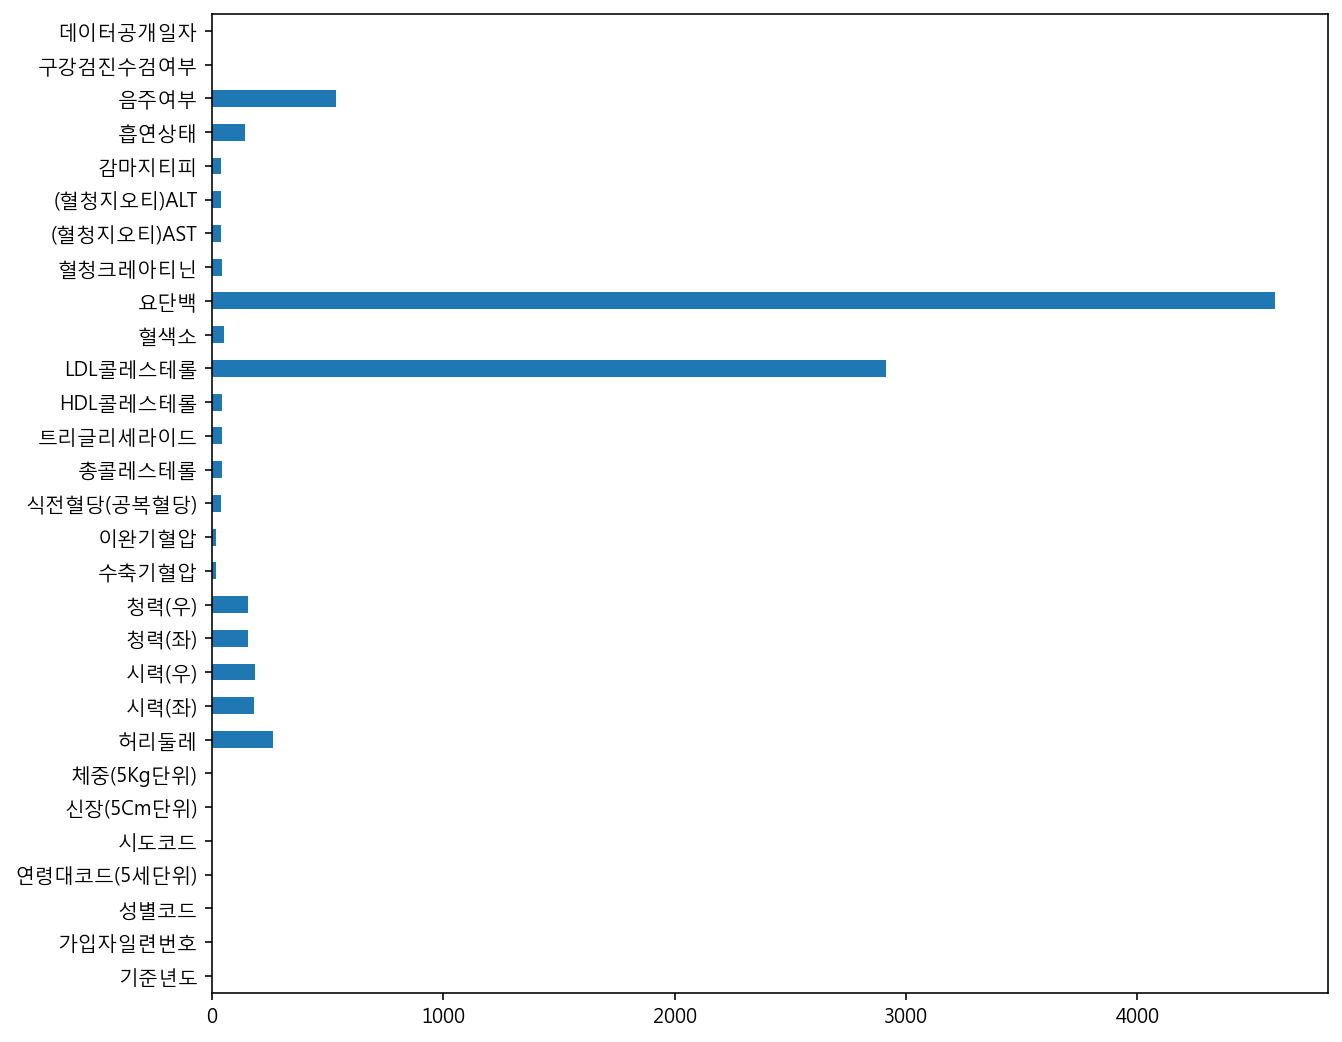

In [ ]:
# 판다스에 내장 된 plot을 통해 시각화
df.isnull().sum().plot.barh(figsize=(10, 9))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   기준년도         1000000 non-null  int64  
 1   가입자일련번호      1000000 non-null  int64  
 2   성별코드         1000000 non-null  int64  
 3   연령대코드(5세단위)  1000000 non-null  int64  
 4   시도코드         1000000 non-null  int64  
 5   신장(5Cm단위)    1000000 non-null  int64  
 6   체중(5Kg단위)    1000000 non-null  int64  
 7   허리둘레         999734 non-null   float64
 8   시력(좌)        999817 non-null   float64
 9   시력(우)        999811 non-null   float64
 10  청력(좌)        999842 non-null   float64
 11  청력(우)        999844 non-null   float64
 12  수축기혈압        999981 non-null   float64
 13  이완기혈압        999982 non-null   float64
 14  식전혈당(공복혈당)   999958 non-null   float64
 15  총콜레스테롤       999957 non-null   float64
 16  트리글리세라이드     999955 non-null   float64
 17  HDL콜레스테롤     999956 non-null   float64
 18  LDL

# 8. 일부 데이터 요약하기

In [ ]:
# 여러 columns을 가져옴
# "(혈청지오티)ALT", "(혈청지오티)AST"를 가져와 미리보기

# 판다스에선 두 개 이상의 데이터를 불러올 경우, 
# 리스트의 형태로 한번 더 감싸야 함
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [ ]:
# "(혈청지오티)ALT", "(혈청지오티)AST"를 요약

# .info는 두 값에 있는 결측치의 수, 데이터의 종류
# describe는 평균, 표준편차 등의 데이터를 요약해줌

df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999958 non-null  float64
 1   (혈청지오티)AST  999959 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

# 9. value_counts 로 값 집계하기

In [ ]:
# 시리즈에 데이터를 집계하여 빈도수를 계산함
# value_counts 를 통해 성별코드로 그룹화 하고 갯수를 집계함
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [ ]:
# value_counts 를 통해 흡연상태로 그룹화 하고 갯수를 집계
# 1은 현재 흡연하고 있지 않은 사람
# 3는 현재 흡연을 하는 사람
# 2는 흡연을 했다가 금연을 한 사람

df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

# 10. groupby 와 pivot_table 사용하기

## 10.1 groupby
- value_count는 두 개 이상의 데이터를 계산할 수 없기에 groupby나 pivot table을 사용해야 함
- groupby를 통해 데이터를 그룹화

In [ ]:
# 성별코드로 그룹화 한 데이터를 계산
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [ ]:
# 성별코드와 음주여부로 그룹화를 하고 갯수를 집계
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

# 남성에 경우, 음주를 하고 있는 사람이 더 많으며,
# 여성에 경우는 음주를 하고 있지 않은 사람들이 더 많음

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [ ]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균을 구함
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

# 음주를 하고 있는 사람들에게서 감마지티피의 값의 평균이 높은 것을 알 수 있음

성별코드  음주여부
1     0.0     34.739868
      1.0     56.610981
2     0.0     22.612408
      1.0     25.001018
Name: 감마지티피, dtype: float64

In [ ]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구함
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [ ]:
# agg를 사용하면 여러 수치를 함께 예측 가능
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   173604  34.739868    25.0
     1.0   356576  56.610981    37.0
2    0.0   326813  22.612408    17.0
     1.0   142429  25.001018    17.0

## 10.2 pivot_table
- groupby는 series의 형태로 변환이 되는 반면,
- pivot table은 data frame의 형태로 변환이 됌


- pivot은 연산을 하지 않고 데이터의 형태만 바꾸자 할 때,
- pivot table은 연산을 할 때

In [ ]:
# 음주여부에 따른 그룹화된 수를 pivot table로 구함
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

가입자일련번호
음주여부         
0.0    500439
1.0    499025

In [ ]:
# 성별, 음주여부에 따른 감마지티피 값의 평균을 구함
pd.pivot_table(df, index="음주여부", values="감마지티피")

감마지티피
음주여부           
0.0   26.819650
1.0   47.588675

In [ ]:
# 기본값은 평균을 구하지만 aggfunc을 통해 지정 가능
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean"])

mean
          감마지티피
음주여부           
0.0   26.819650
1.0   47.588675

In [ ]:
# aggfunc에 여러 값을 한번에 지정 가능
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", 'median'])

mean median
          감마지티피  감마지티피
음주여부                  
0.0   26.819650   19.0
1.0   47.588675   30.0

In [ ]:
# aggfunc에 describe를 사용해 통계요약값을 한번에 볼 수 있음
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부                                                              
0.0   14.0  19.0  29.0  500417.0  999.0  26.819650  1.0  30.639714
1.0   18.0  30.0  52.0  499005.0  999.0  47.588675  1.0  63.056912

In [ ]:
# 성별코드, 음주여부에 따른 감마지티피 값의 평균을 계산
pd.pivot_table(df, index=["성별코드","음주여부"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     1.0   24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    0.0   13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     1.0   13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 11 전체 데이터 시각화 하기
- 100만 개가 넘는 데이터를 시각화할 때는 되도록이면 groupby 혹은 piovt_table로 연산을 한 후 시각화를 권장
- 100만 개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을 하는 그래프로 사용하게 되면 연산처리가 많이 느림

## 11.1 히스토그램
- 데이터가 info 기능을 통해 대부분 수치데이터로 이뤄져 있음
- 히스토그램을 사용하면 수치데이터를 bin의 갯수만큼 그룹화해서 도수분포표를 만들고 그 결과를 시각화할 수 있다.

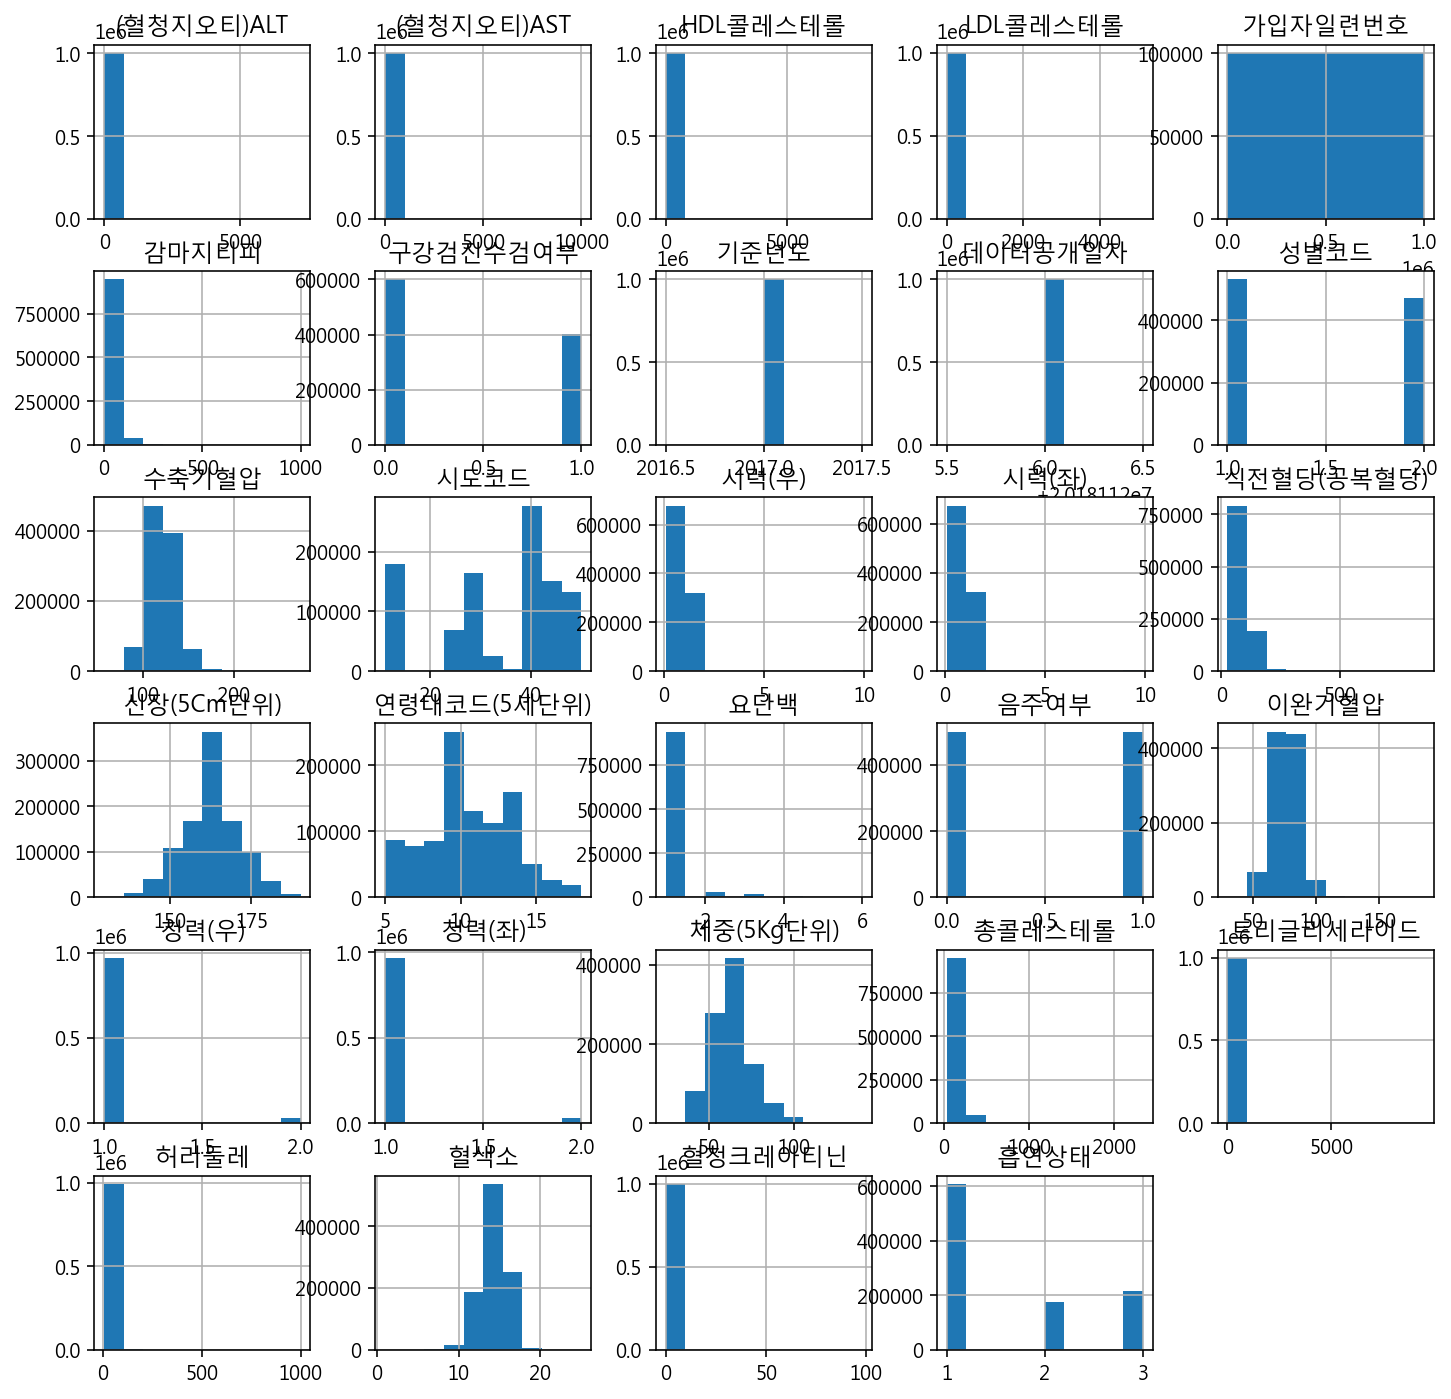

In [ ]:
# 전체 데이터에 대한 히스토그램 출력
h = df.hist(figsize=(12, 12))

## 11.2 slicing을 사용하여 히스토그램 나누기
- slicing 기능을 사용해서 데이터를 나누어 그림
- slicing 사용 시 iloc를 활용하면 인덱스의 순서대로 slicing이 가능
- iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 불러오려면 [:,:]를 사용함
- slicing을 해주는 대괄호 안의 columns 앞 뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스(+1)를 지정 가능

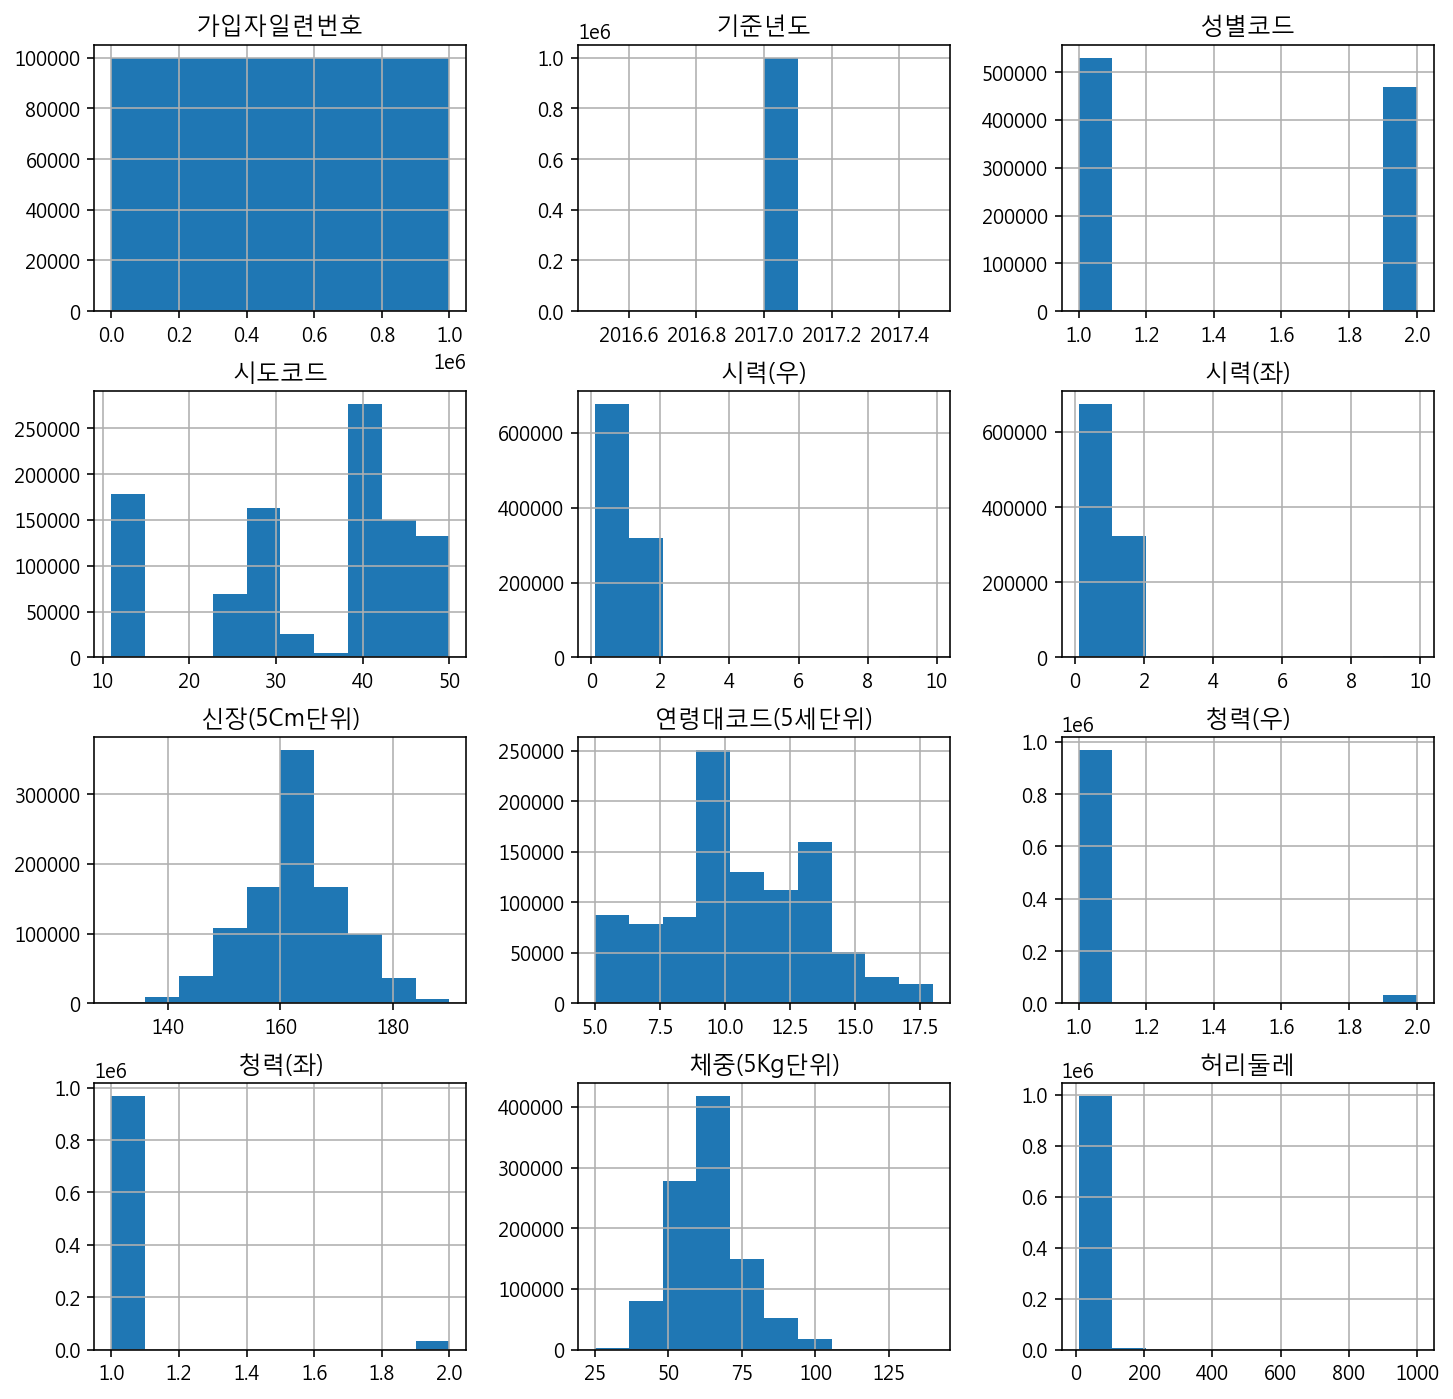

In [ ]:
# slicing을 사용해서 앞에서 12개의 columns에 대한 데이터로 히스토그램 그림
# [행, 열]
h = df.iloc[:,:12].hist(figsize=(12,12))

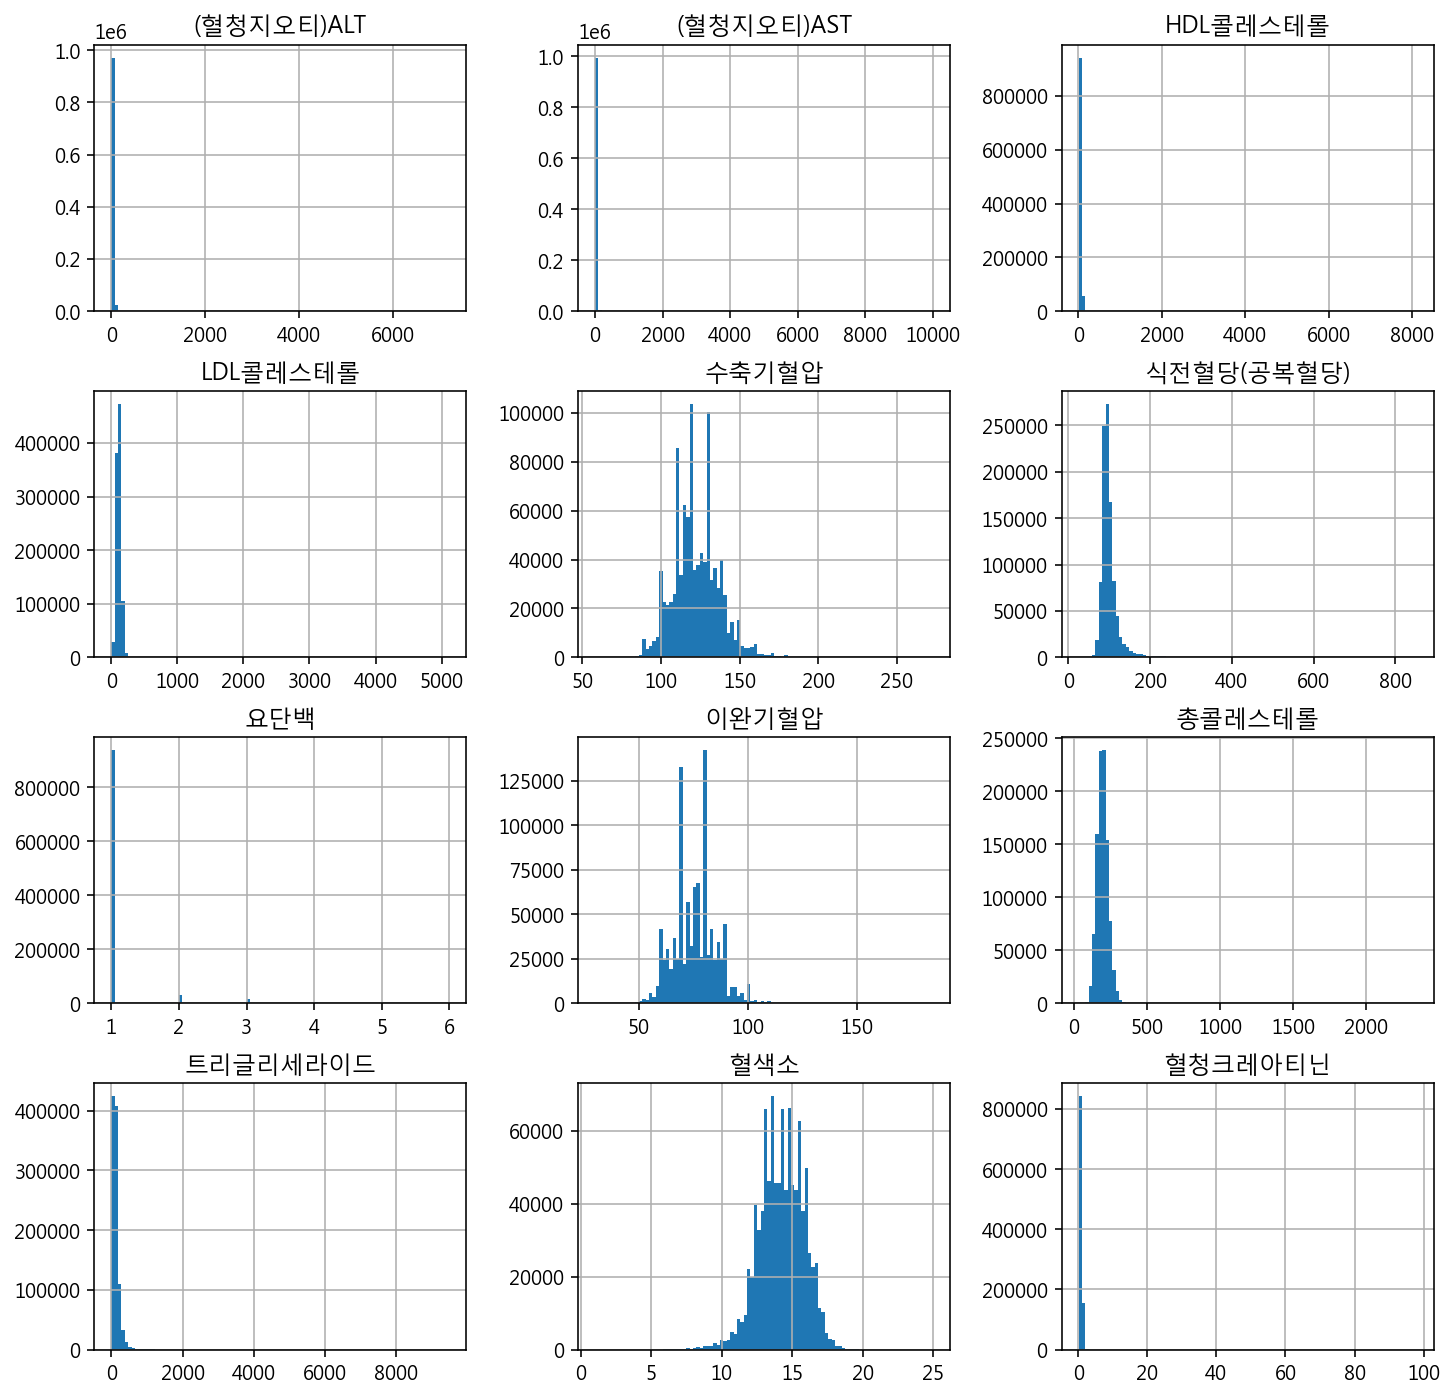

In [ ]:
# slicing을 사용해서 앞에서 12번째부터 23번째까지 (12:24) columns 에 대한 데이터로 히스토그램을 그림
h =df.iloc[:,12:24].hist(figsize=(12,12), bins=100)

# bins는 막대의 갯수를 잘게 잘라서 보여주기에 값의 분포를 더 잘게 보여줌

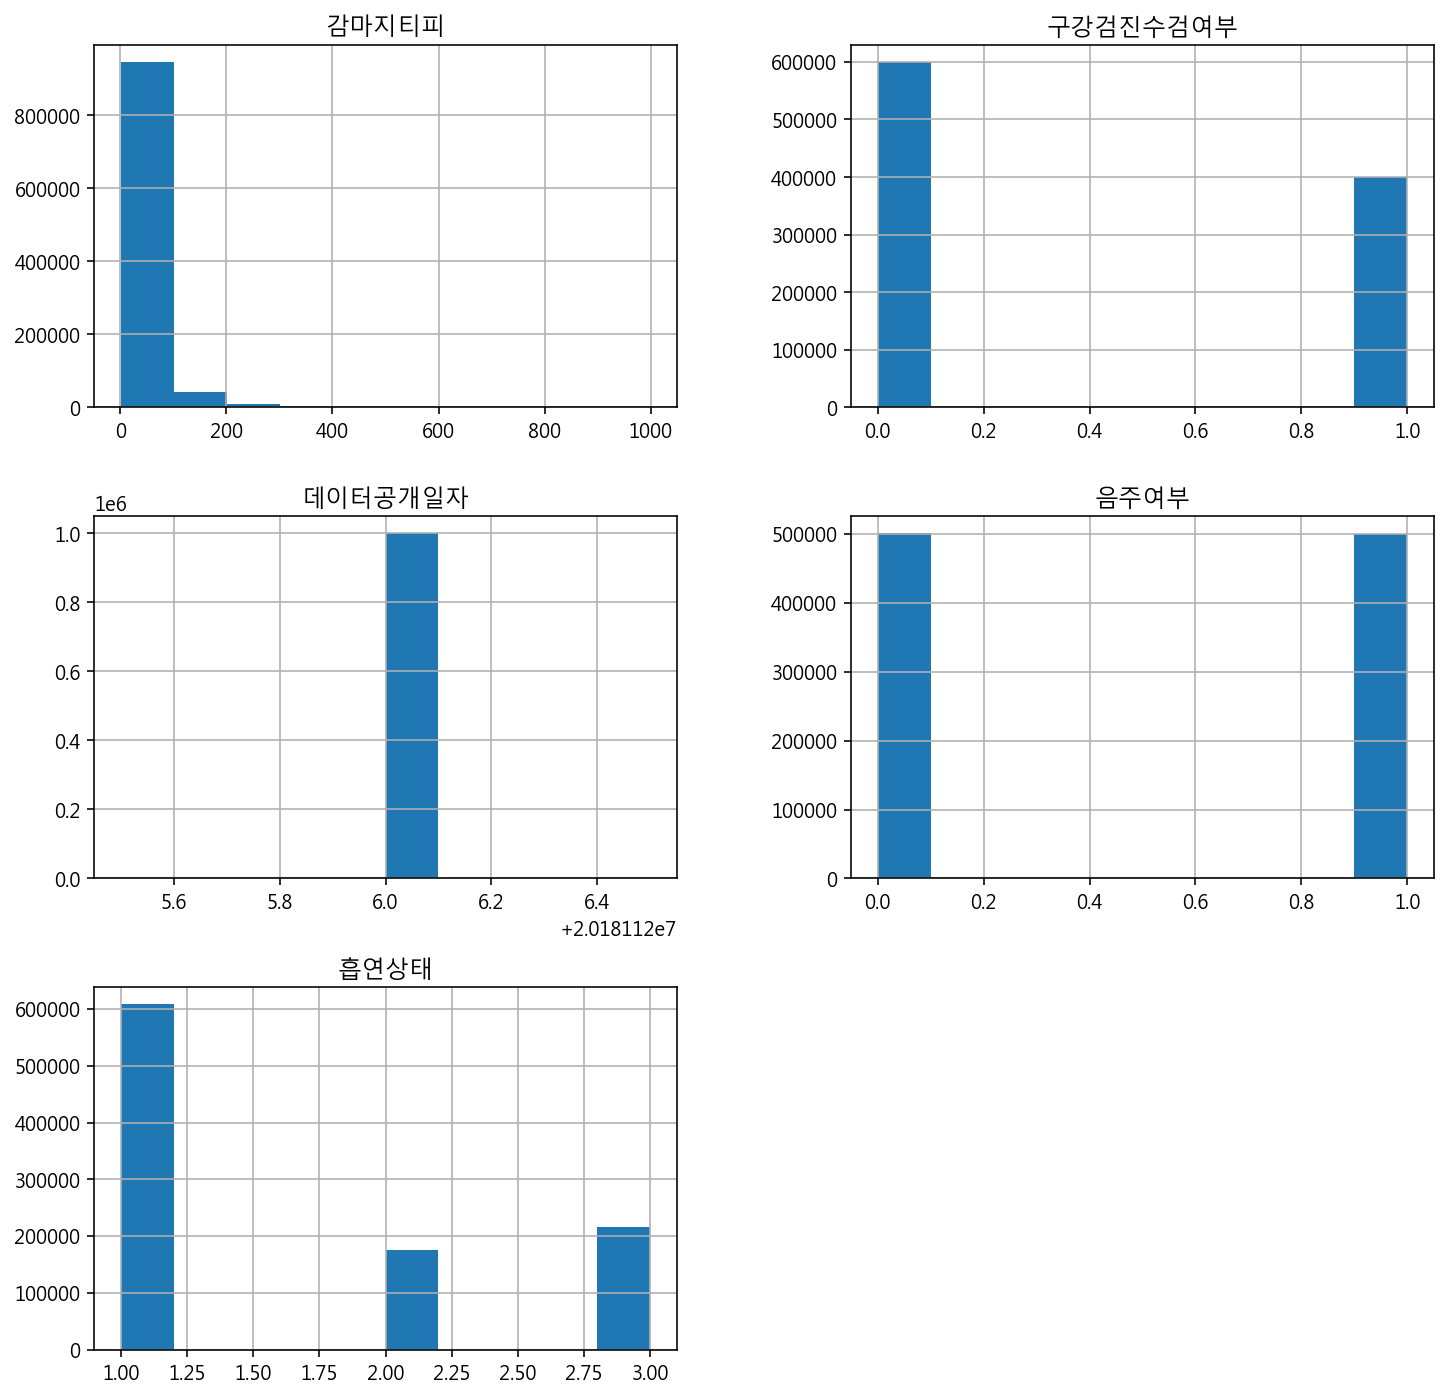

In [ ]:
# slicing을 사용해서 앞에서 24번째부터 마지막까지 (24:) columns 에 대한 데이터로 히스토그램을 그림
h =df.iloc[:,24:].hist(figsize=(12,12), bins=10)

# 12 샘플 데이터 추출 하기
- seaborn의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도가 느림
- 따라서 일부 데이터만 샘플링 하여 추출

In [ ]:
# df.sample을 통해 일부 데이터만 샘플 데이터를 추출
# ramdom_state 를 사용하여 샘플링하는 값을 고종
# 실험을 통제하기 위해 random_state를 고정하기도 함
# 여기서는 1로 고정, 이 값은 높든 낮든 상관없이 값을 고정시키는 역할

df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 29)

# 13 범주형(카테고리) 데이터 시각화
- countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현
- value_counts 로 구한 값을 시각화


- 범주형 데이터란 string, 문자열로 만들어진 데이터
- 수치형 데이터란 숫자로 이루어진 데이터

## 13.1 countplot - 음주여부

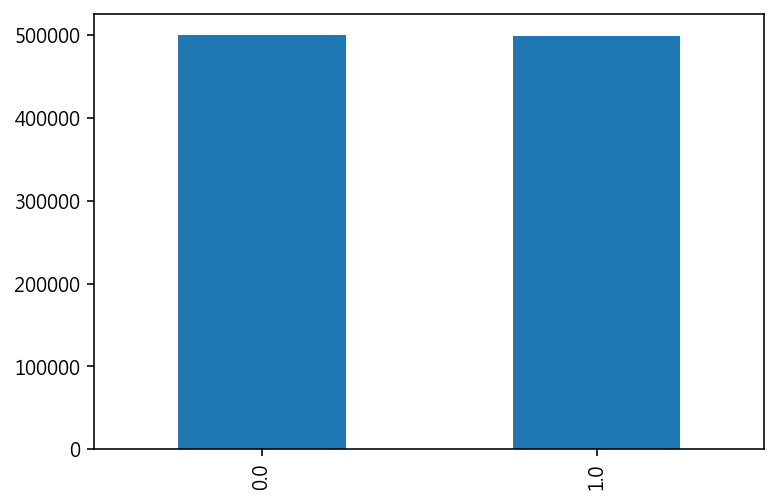

In [ ]:
# 음주여부에 따른 countplot을 그림
df["음주여부"].value_counts().plot.bar()

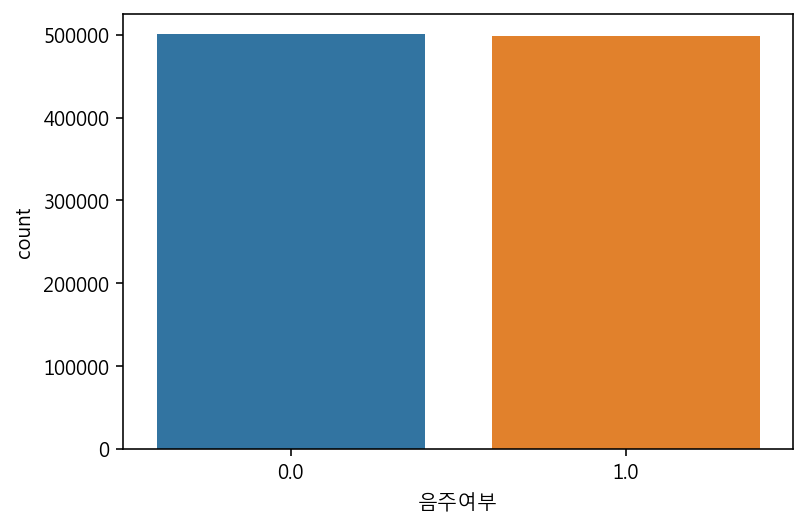

In [ ]:
sns.countplot(x="음주여부", data=df)

## 14.2 hue 옵션 사용하기

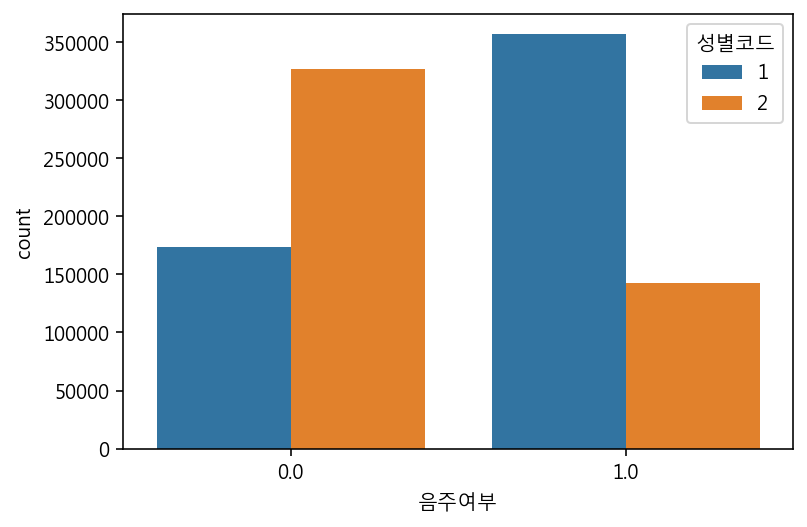

In [ ]:
# 음주여부에 따른 countplot을 그리고 hue를 사용해 성별코드로 색상을 구분해 그림
# 여기에서 hue는 포토샵에 있는 색상 기능 과 동일
# 또, seaborn 에서 제공하는 폰트 설정을 사용가능
# 다만, 이 때 seaborn의 기본 스타일이 적용 되는 것을 확인해야 함


sns.countplot(data= df, x="음주여부", hue="성별코드")

# 그래프에서 남성이 여성보다 음주하는 사람들이 많은 것을 볼 수가 있음

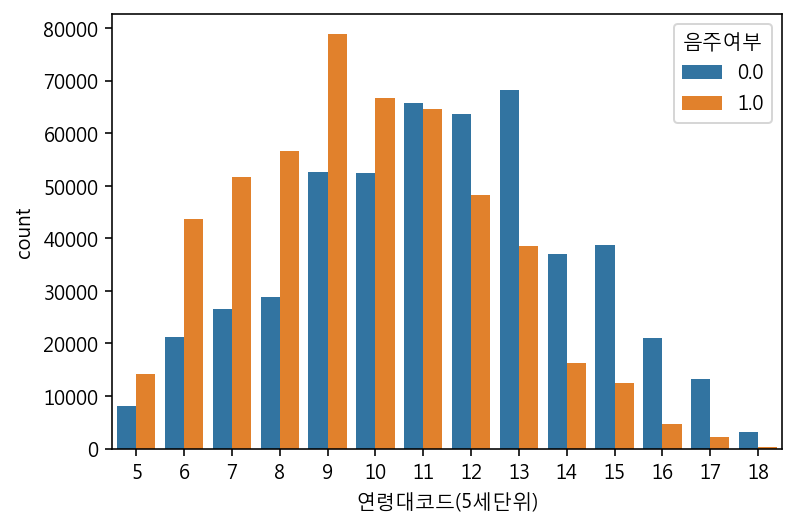

In [ ]:
# countplot으로 연령대별 음주여부를 관찰
# hue를 사용해 다른 색상으로 표현
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

## 14.3 countplot - 키와 몸무게
- 키와 몸무게는 연속형 데이터
- 하지만 이 데이터는 키 5cm, 체중은 5kg 단위로 되어 있음
- 이렇게 특정 범위로 묶게 되면 연속적 데이터라기 보다는 범주형 데이터라고 볼 수 있음

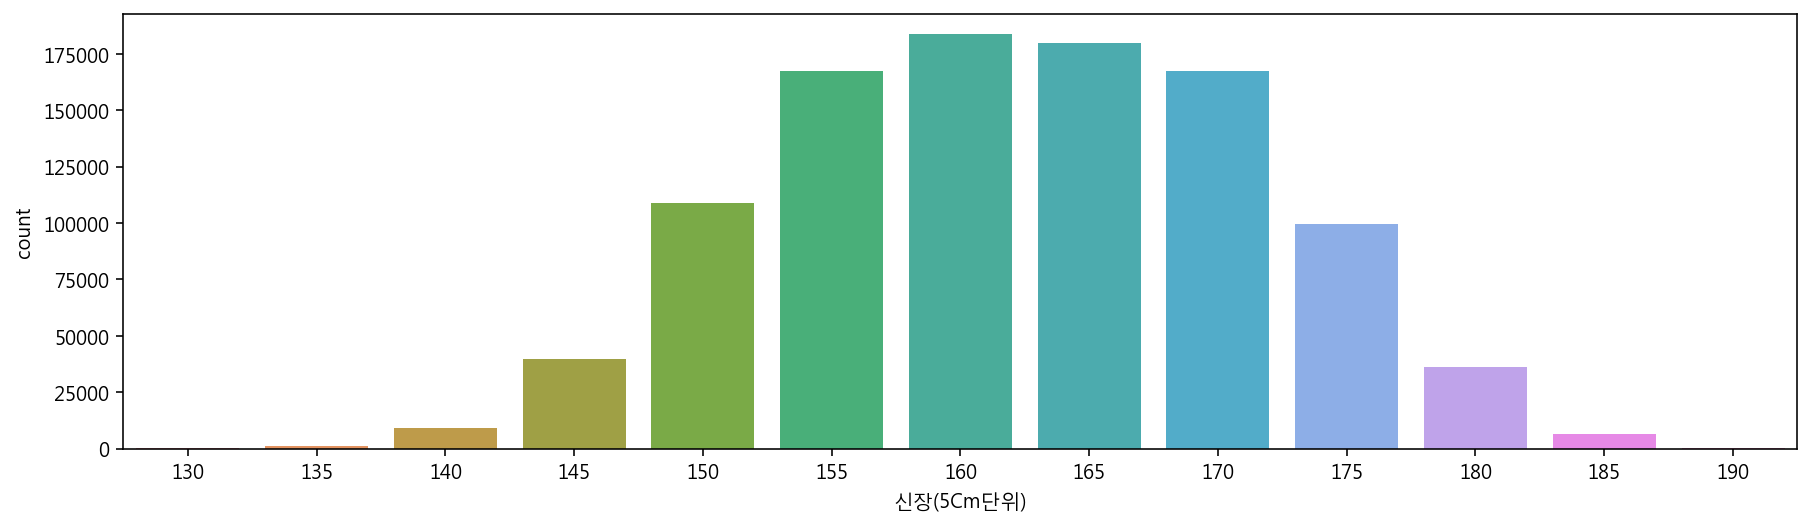

In [ ]:
# countplot으로 키를 시각화
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)")

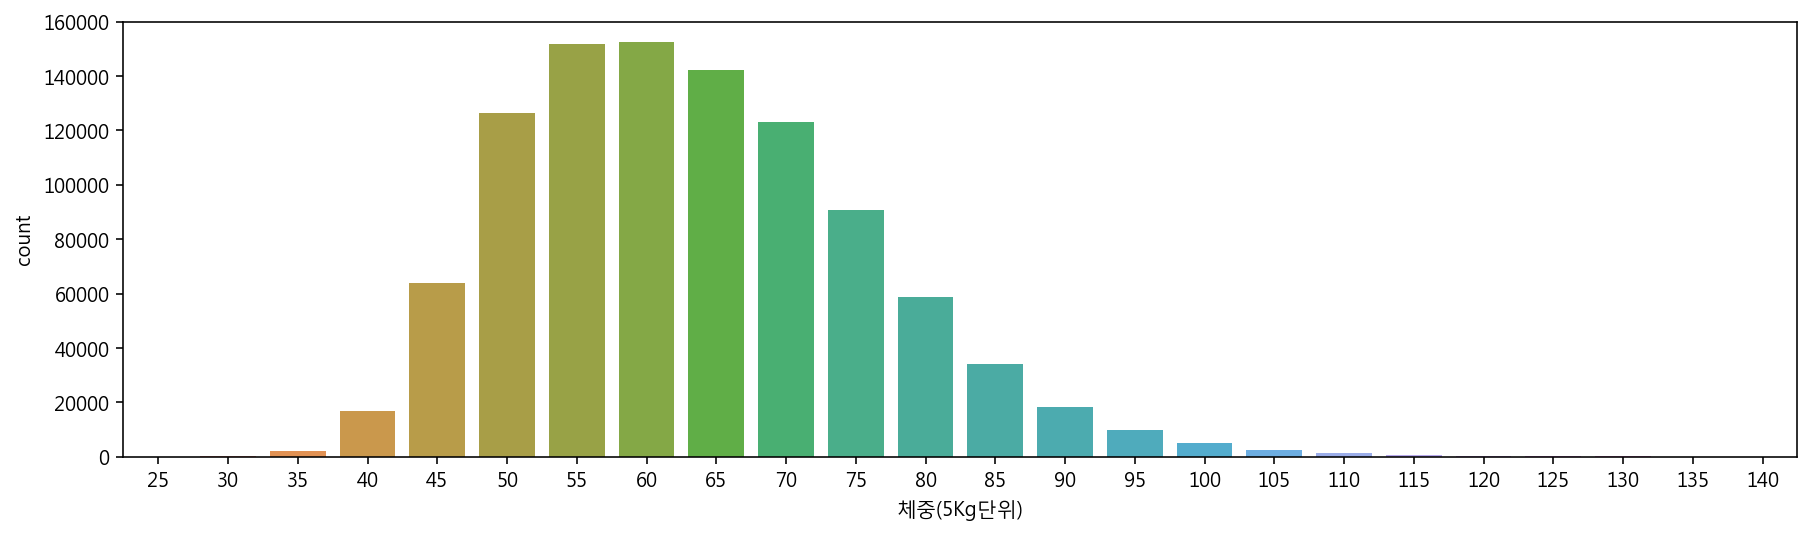

In [ ]:
# countplot으로 체중을 시각화
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)" )

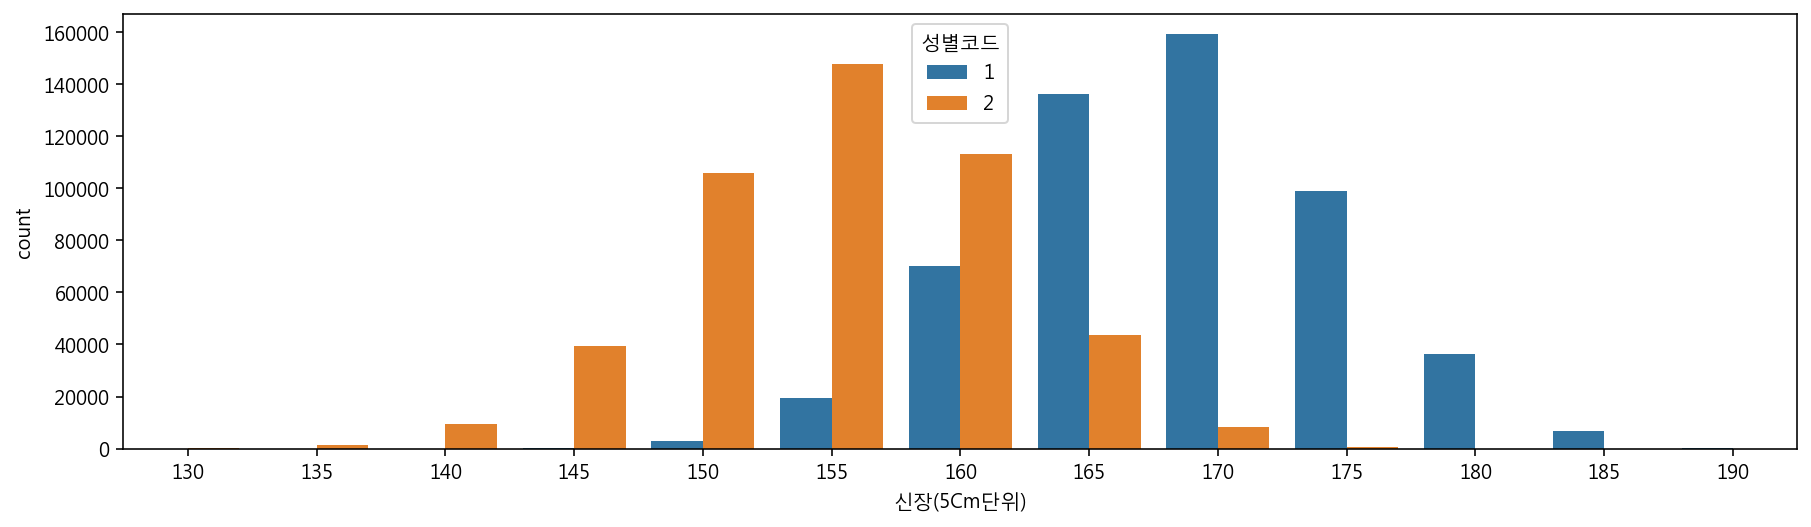

In [ ]:
# countplot으로 신장(5cm 단위)를 본다
# 성별에 따른 키의 차이를 살펴봄
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드" )

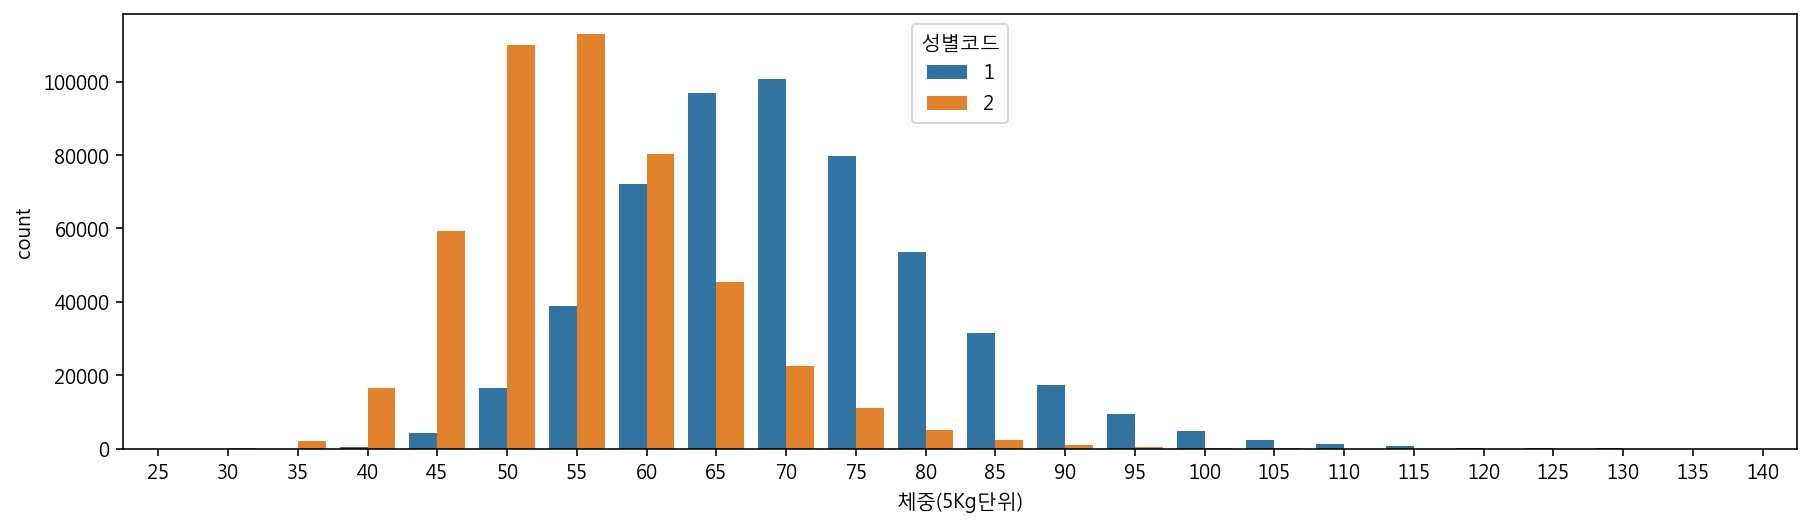

In [ ]:
# 성별에 따른 체중의 차이를 살펴봄
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드" )

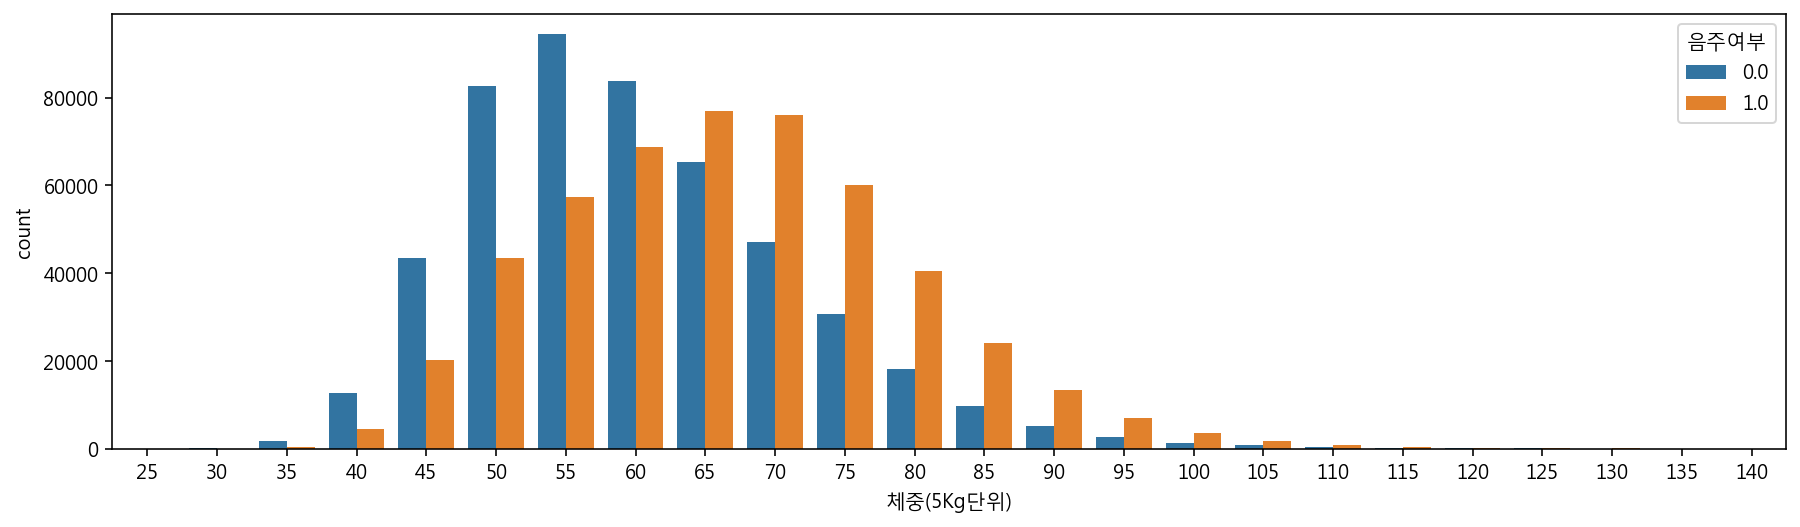

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="음주여부" )

## 14.4 barplot - 수치형 vs 범주형 데이터 시각화

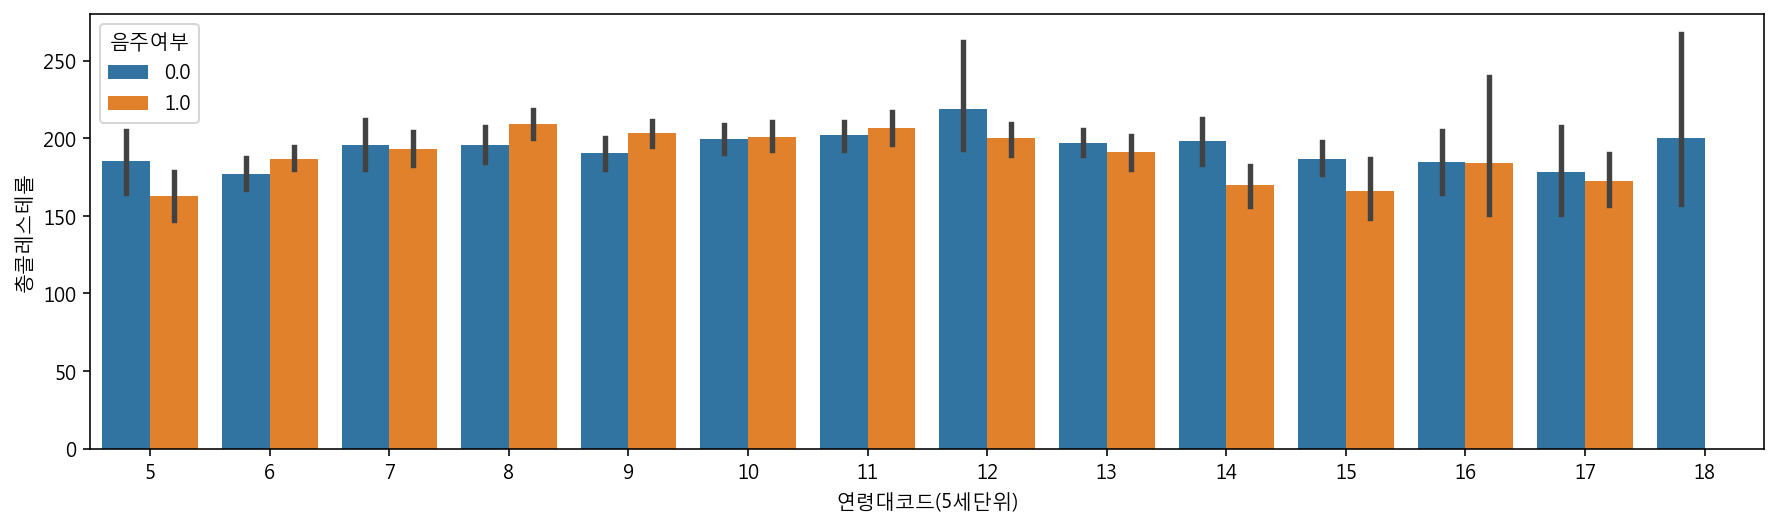

In [ ]:
# 연령대코드와 총 콜레스테롤을 비교
# hue 로 색상을 다르게 표현 가능,
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

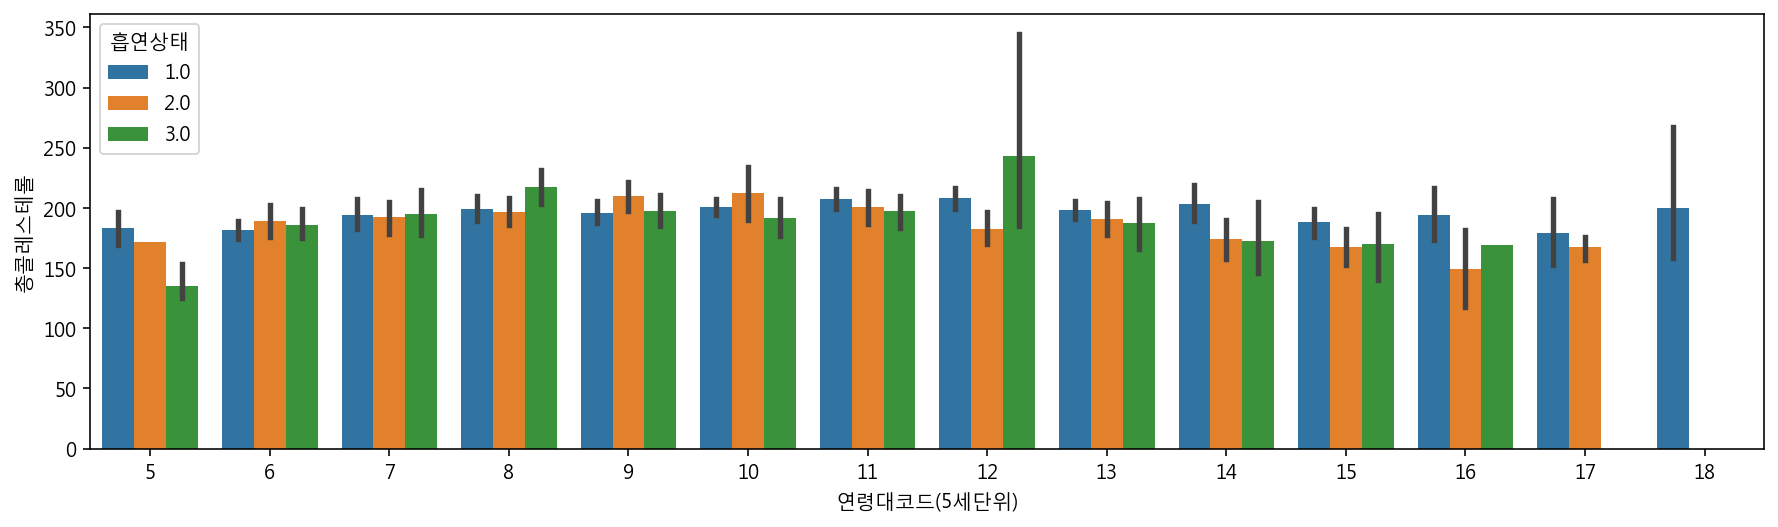

In [ ]:
# 연령대코드와 총 콜레스테롤을 비교
# 콜레스테롤과 연령대코드(5세단위)를 흡연상태에 따라 barplot으로 그림
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

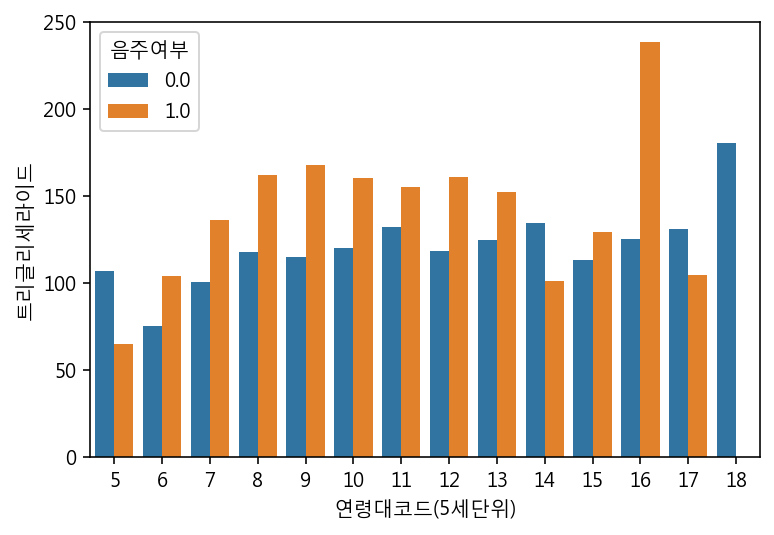

In [ ]:
# 트리글리세라이드(중성지방) 에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그림

sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=None)

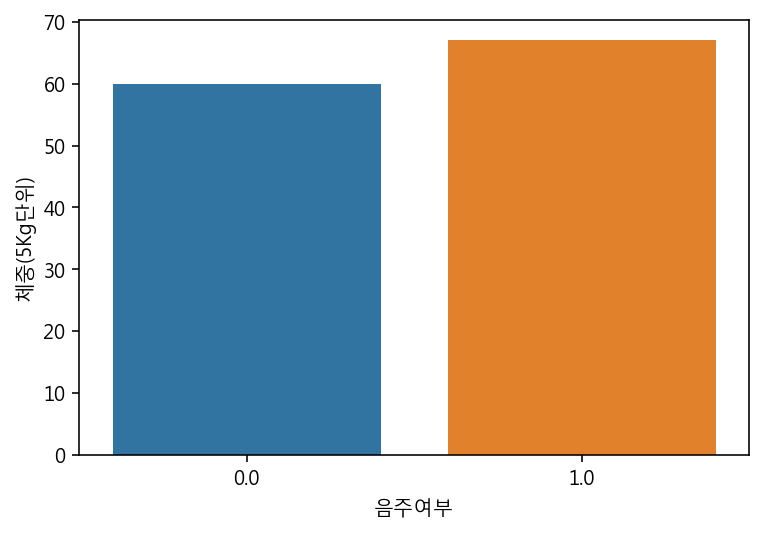

In [ ]:
# 음주여부와 체중 (5Kg 단위)을 성별에 따라 봄
sns.barplot(data=df_sample, x="음주여부", y="체중(5Kg단위)", ci=None)

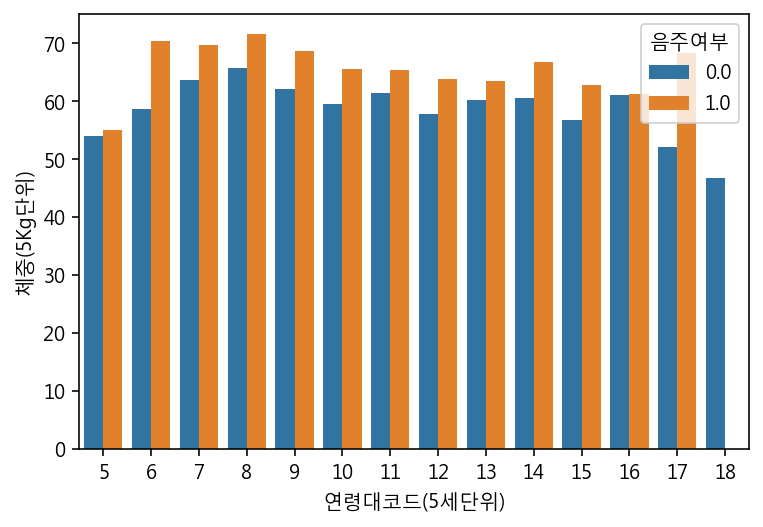

In [ ]:
# 연령대코드(5세단위)에 따른 체중(5Kg 단위)을 음주여부에 따라 barplot으로 그림
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci=None)

## 14.5 lineplot and pointplot

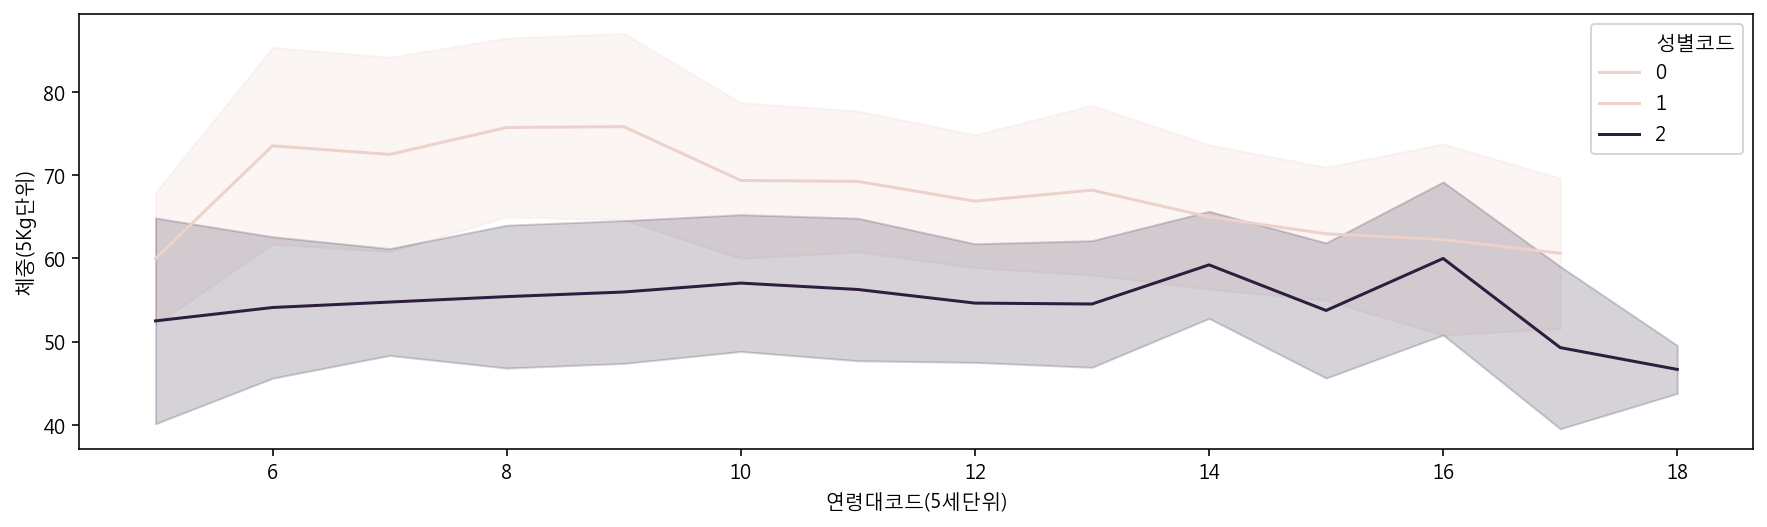

In [ ]:
# 연령대코드(5세단위) 에 따른 체중 (5Kg 단위)을 성별코드에 따라 lineplot으로 그림

plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci="sd")

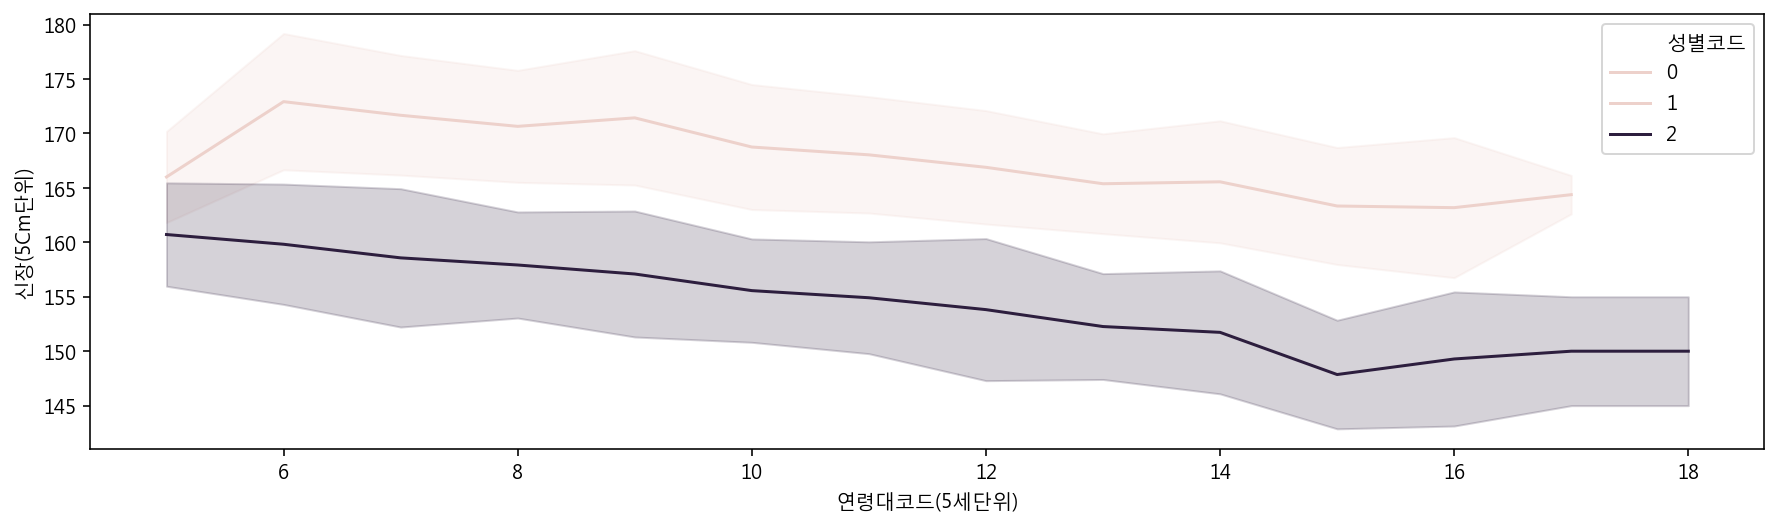

In [ ]:
# 연령대코드(5세단위) 에 따른 신장 (5Cm 단위)을 성별코드에 따라 lineplot으로 그림

plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

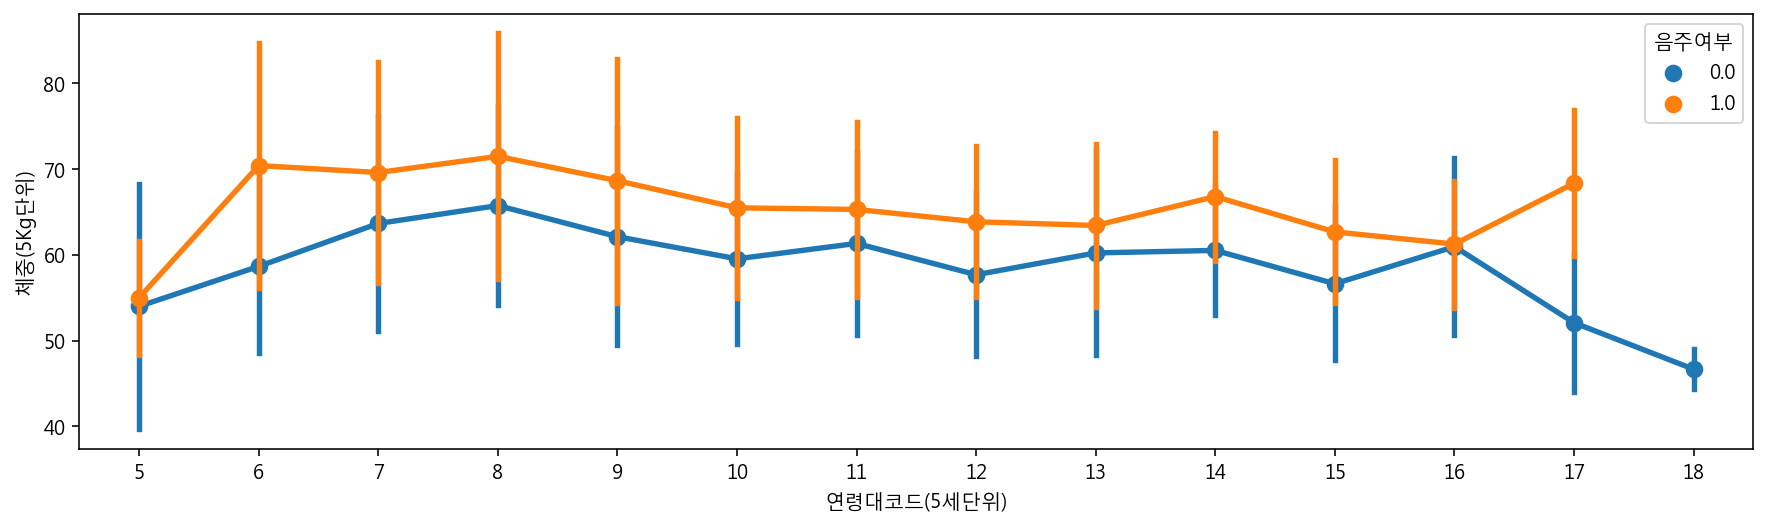

In [ ]:
# 연령대코드(5세단위) 에 따른 체중 (5Kg 단위)을 음주여부에 따라 pointplot과 barplot으로 그림

plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci="sd")

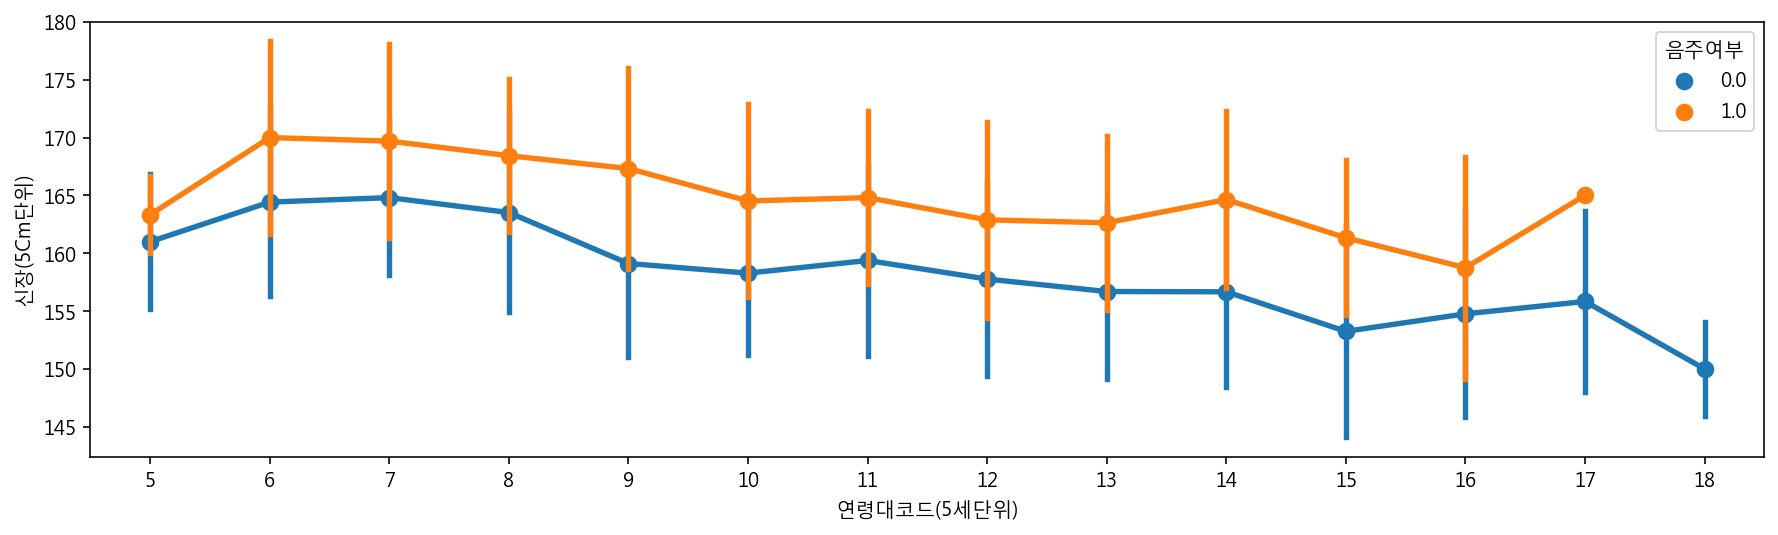

In [ ]:
# 연령대코드(5세단위) 에 따른 신장 (5Cm 단위)을 성별코드에 따라 pointplot으로 그림


plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

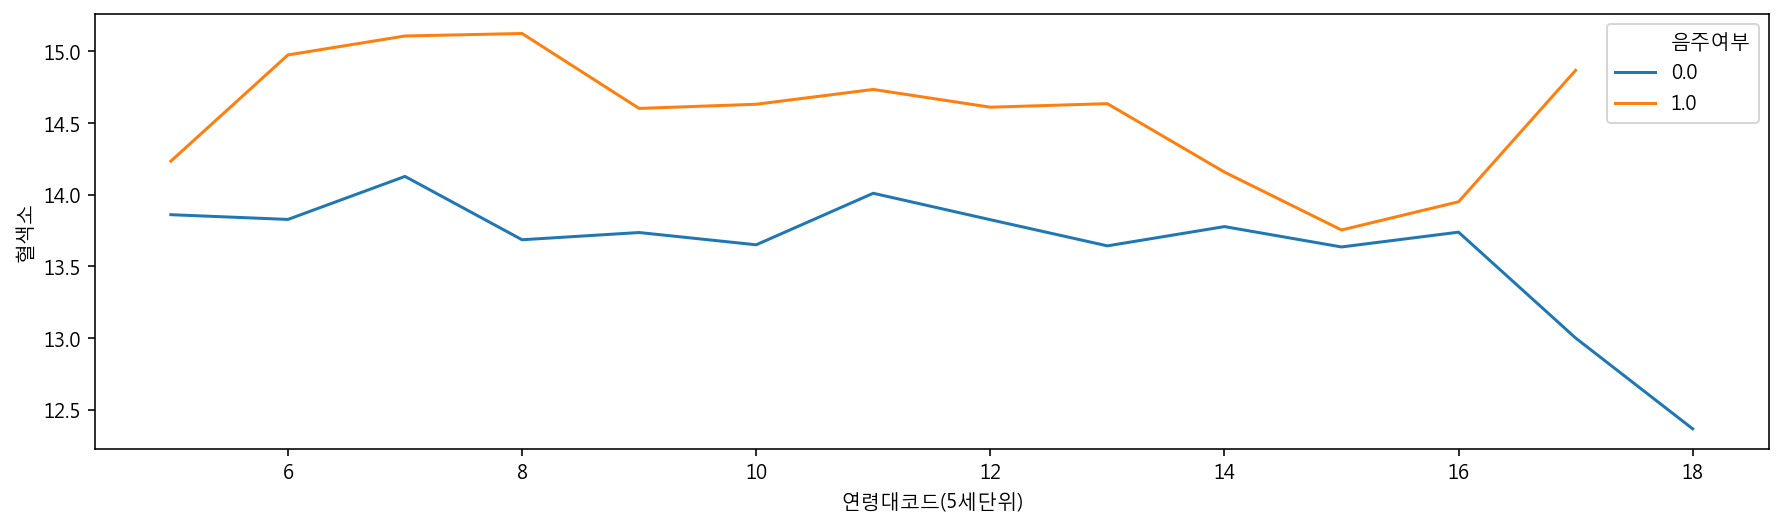

In [ ]:
# 연령대코드(5세단위) 에 따른 혈색소를 음주여부에 따라 lineplot으로 그림

plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

## 14.6 boxplot
- 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료부터 얻어낸 통계량인 5가지 요약 수치로 그린다,
- 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯가지 수치를 의미

1. 최솟값
2. 제 1사분위수
3. 제 2사분위수(), 즉 중앙값
4. 제 3사분위수()
5. 최댓값


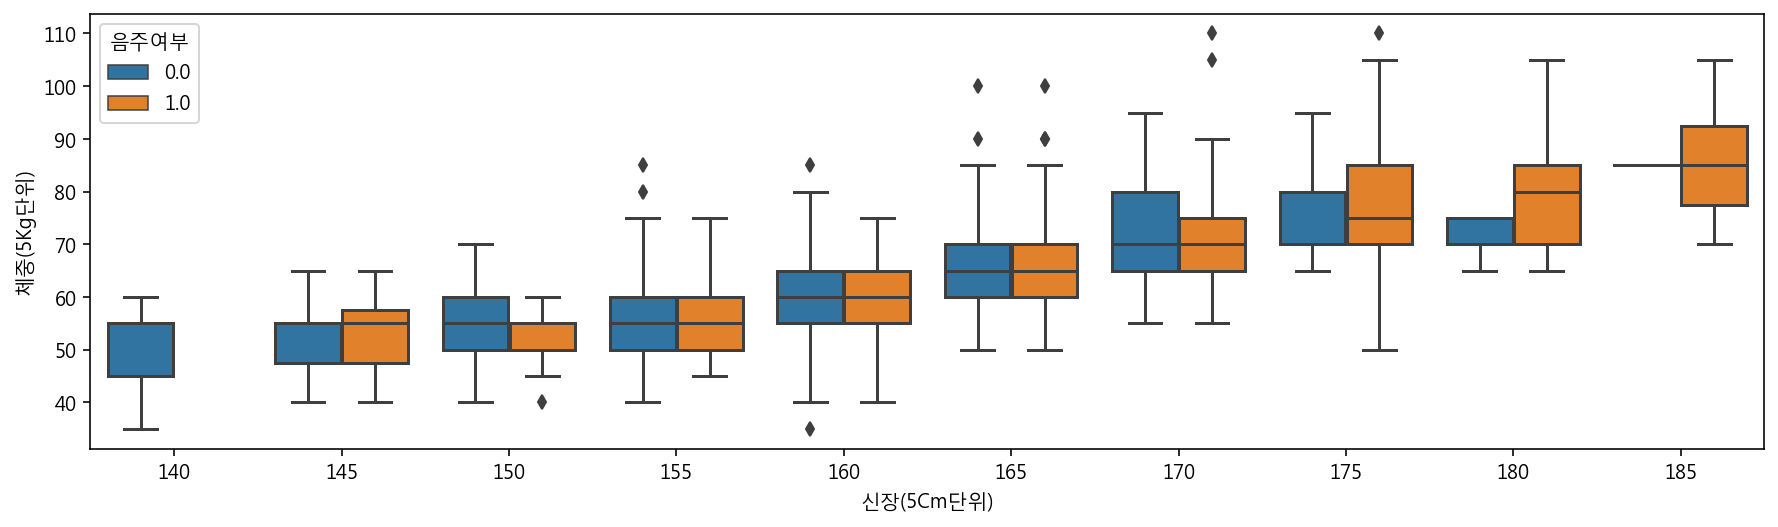

In [ ]:
# boxplot으로 신장(5Cm 단위)에 따른 체중(5Kg 단위) 을 그리며, 성별코드에 따라 다른 색상으로 표시
plt.figure(figsize=(15, 4))
sns.boxplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

## 14.7 violinplot

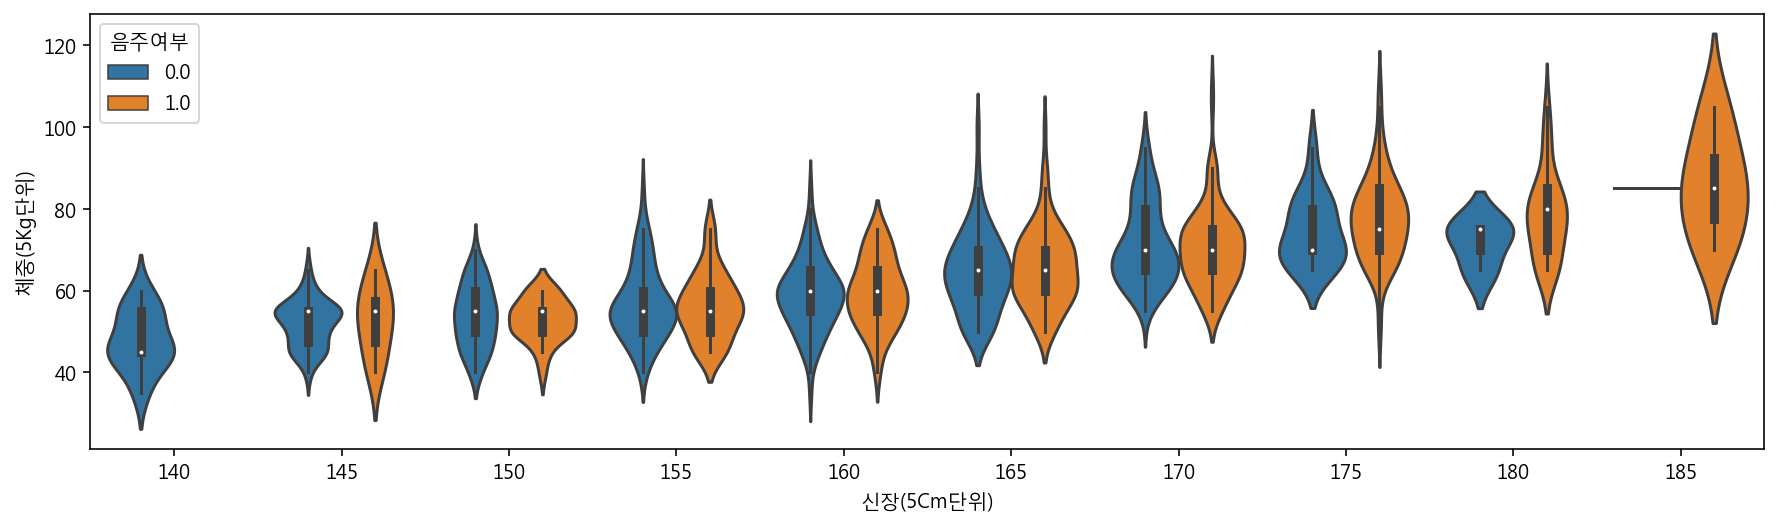

In [ ]:
# violinplot의 신장(5Cm단위)에 따른 체중(5Kg단위) 을 그리며, 음주여부에 따라 다른 색상으로 표시

plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

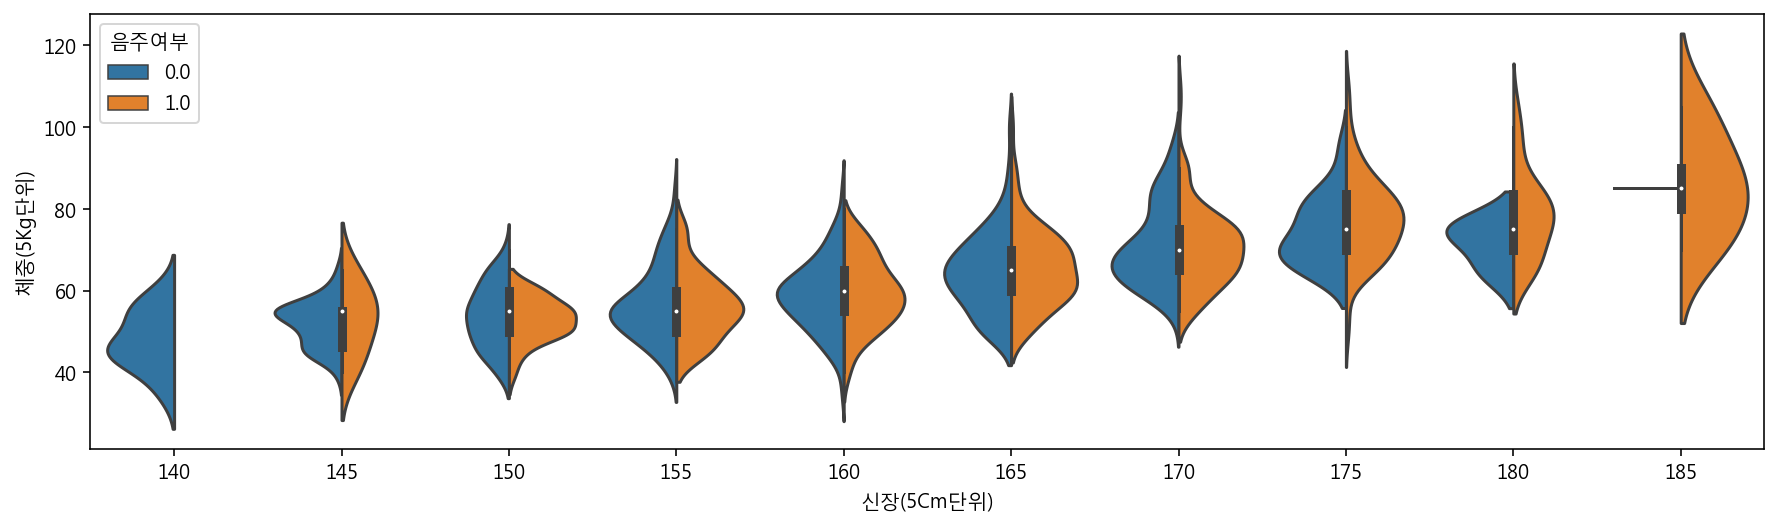

In [ ]:
# violinplot의 split 기능

plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부", split=True)

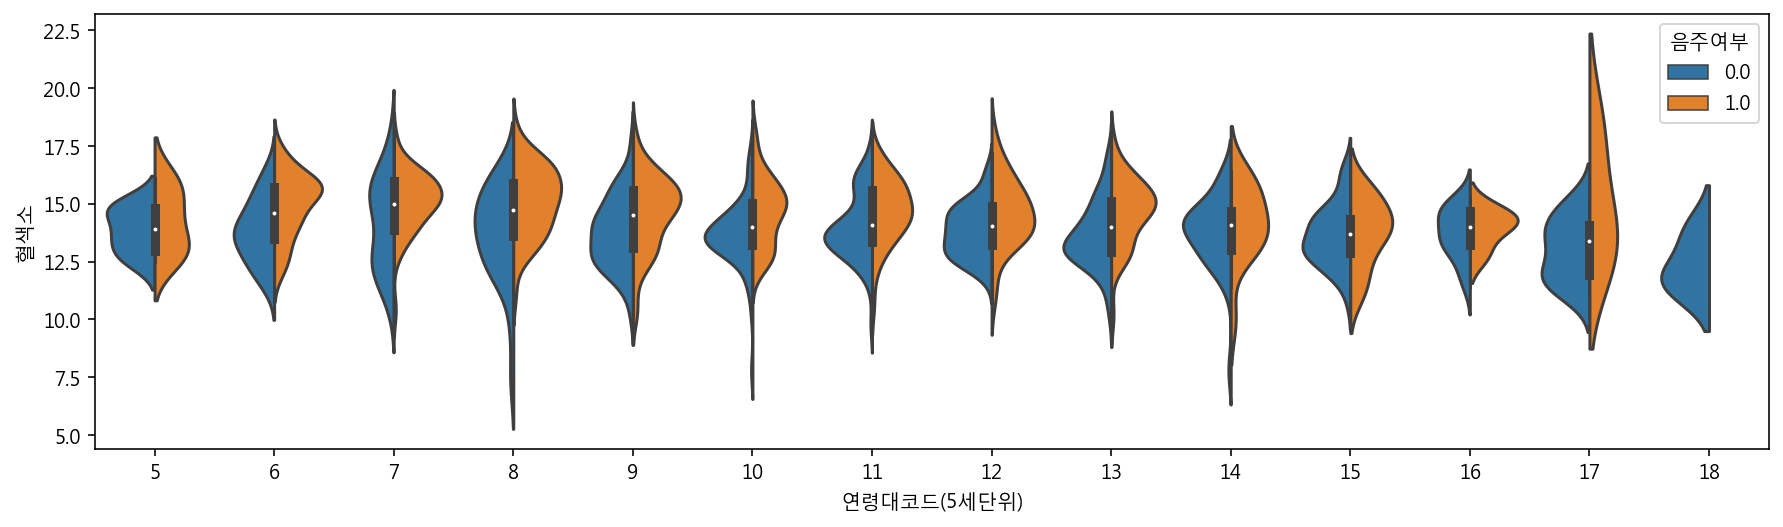

In [ ]:
# violinplot 연령대코드(5세단위)에 따른 혈색소를 그리며, 음주여부에 따라 다른 색상으로 표시

plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

## 14.8 swarm plot
- 범주형 데이터를 산점도로 시각화하고자 할 때 사용

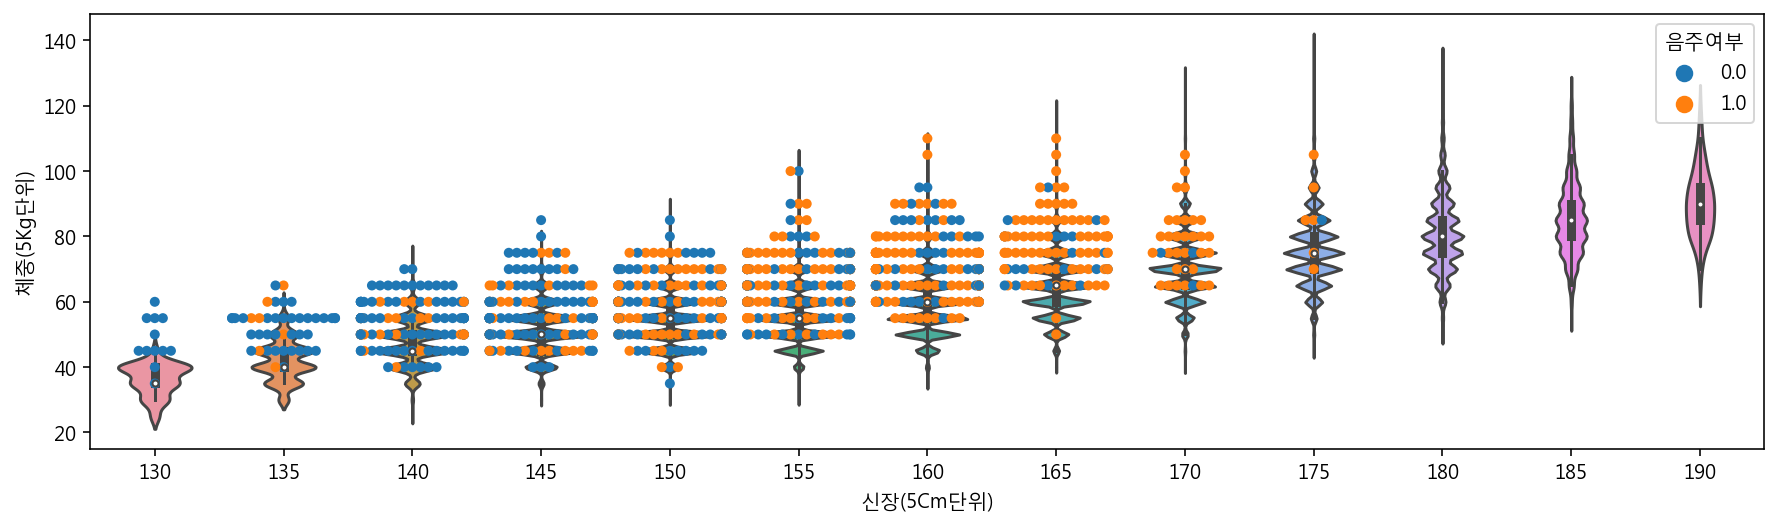

In [ ]:
# swarm plot으로 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리며, 음주여부에 따라 다른 색상으로 표시
# 점을 하나씩 찍기에 데이터가 많은 데이터는 시간이 오래 걸림

plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")
sns.violinplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


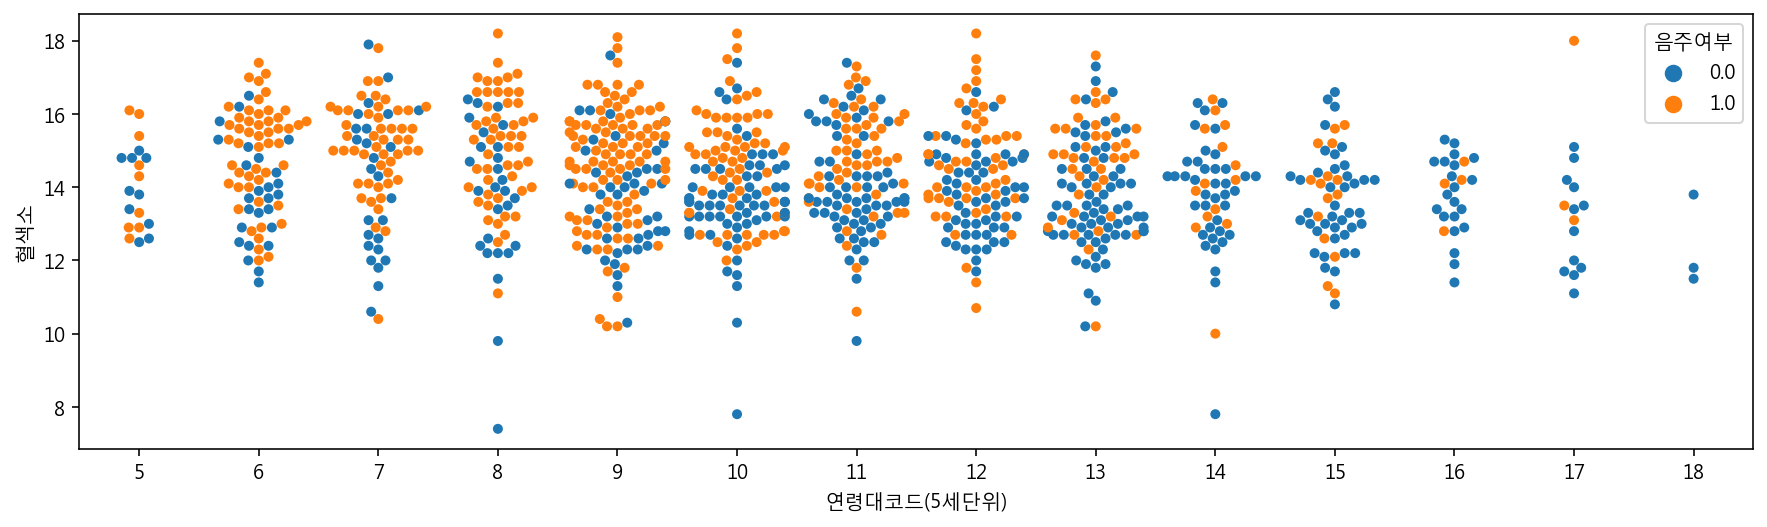

In [ ]:
# swarm plot으로 연령대코드(5세단위)에 따른 음주여부를 그리며, 성별코드에 따라 다른 색상으로 표시
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

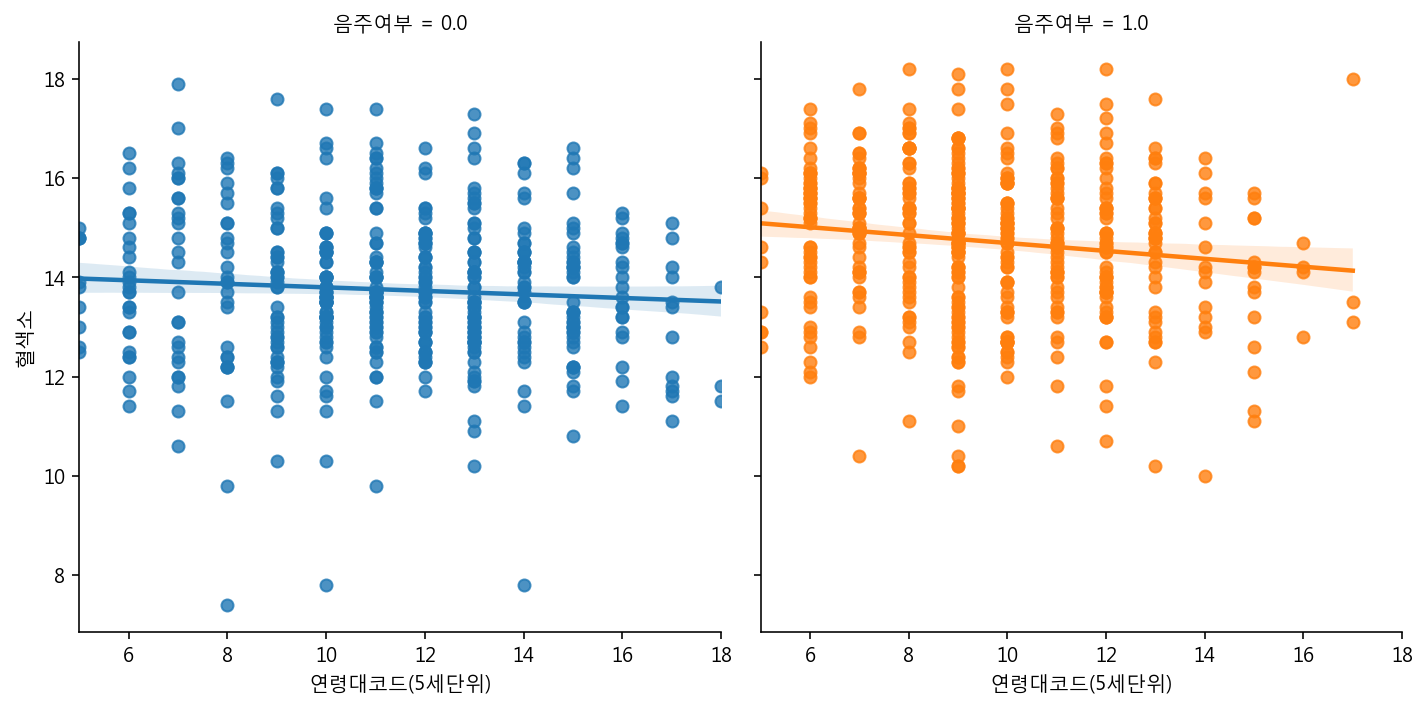

In [ ]:
# lmplot으로 시각화
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="음주여부")

# 15 수치형 데이터 시각화

## 15.1 scatterplot - 산점도
- 수치형 VS 수치형데이터의 상관관계를 볼 때 주로 사용
- 점의 크기를 데이터의 수치에 따라 다르게 볼수 있음

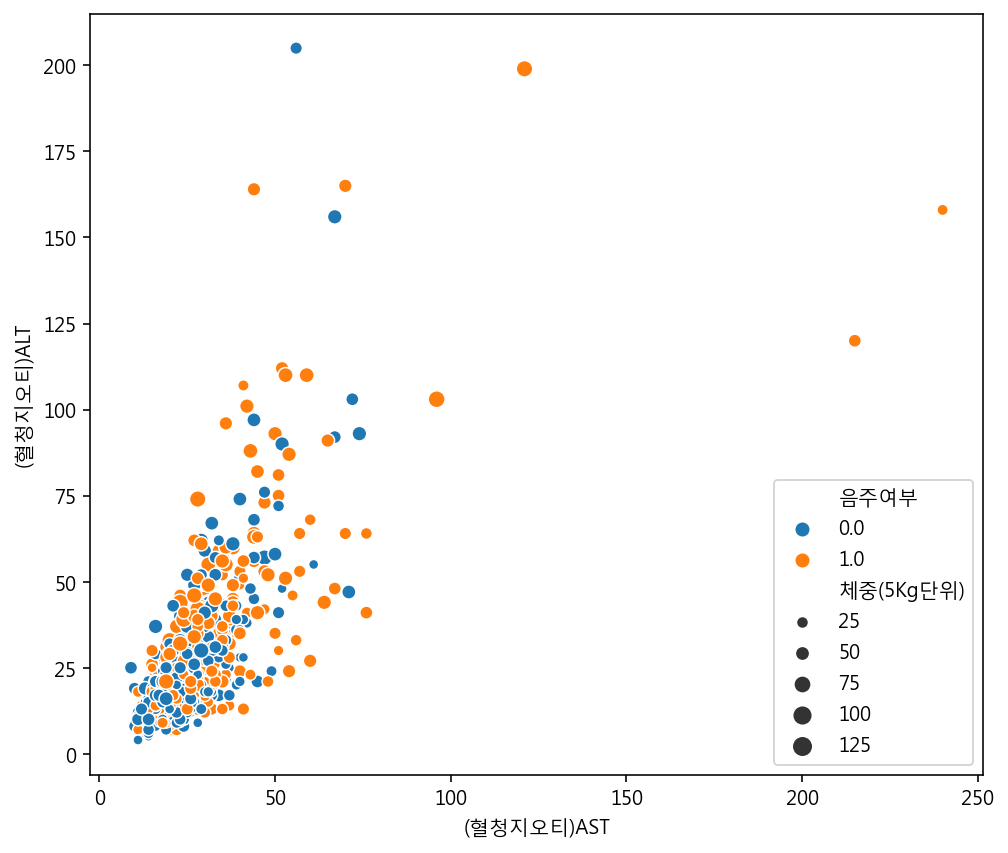

In [ ]:
# scatterplot으로 "(혈청지오티)AST", "(혈청지오티)ALT"을 그리고 음주여부에 따라 다른 색상으로 표현
# hue 값에 연속적인 데이터를 넣을 수 있다.
# 이상치를 살펴보기 좋음

plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg단위)")


## 15.2 lmplot - 상관 관계 조사

<Figure size 576x504 with 0 Axes>

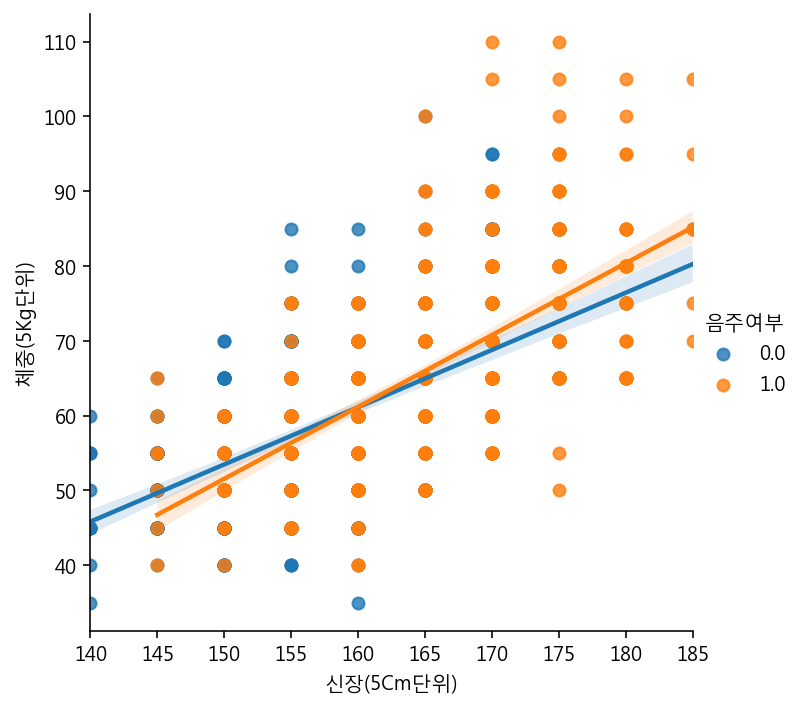

In [ ]:
# lmplot으로 신장(5Cm단위)에 따른 체중(5Kg)을 그리며, 음주여부에 따라 다른 색상으로 표현
# 체중이 5kg 단위로 카테고리화 되어 있기 때문에 격자 형태로 보임

plt.figure(figsize=(8, 7))
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")


<Figure size 576x504 with 0 Axes>

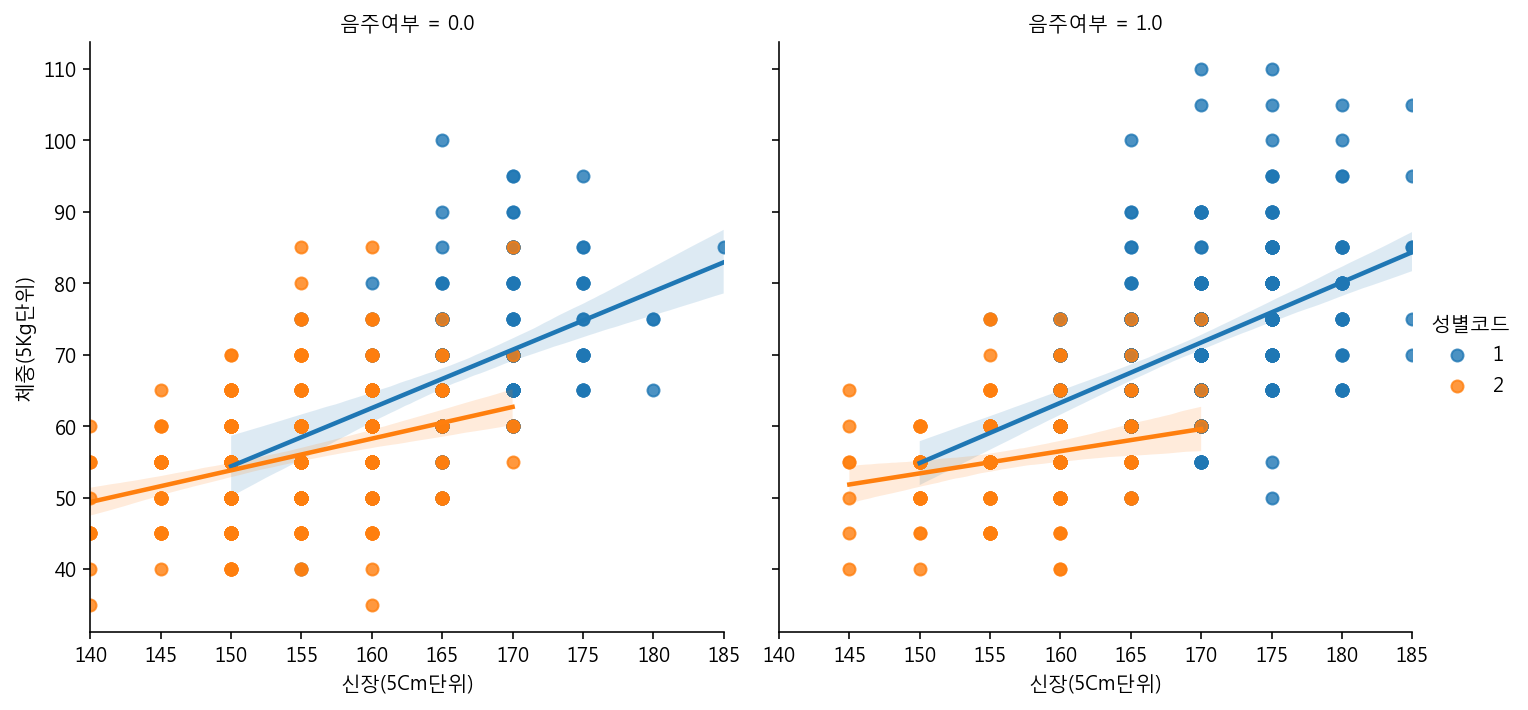

In [ ]:
# lmplot의 col기능을 통해 음주여부에 따른 서브플롯을 그릴 수 있음
# 이 그래프에서 신장과 체중은 양의 상관관계가 있다

plt.figure(figsize=(8, 7))
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드", col="음주여부")

<Figure size 576x504 with 0 Axes>

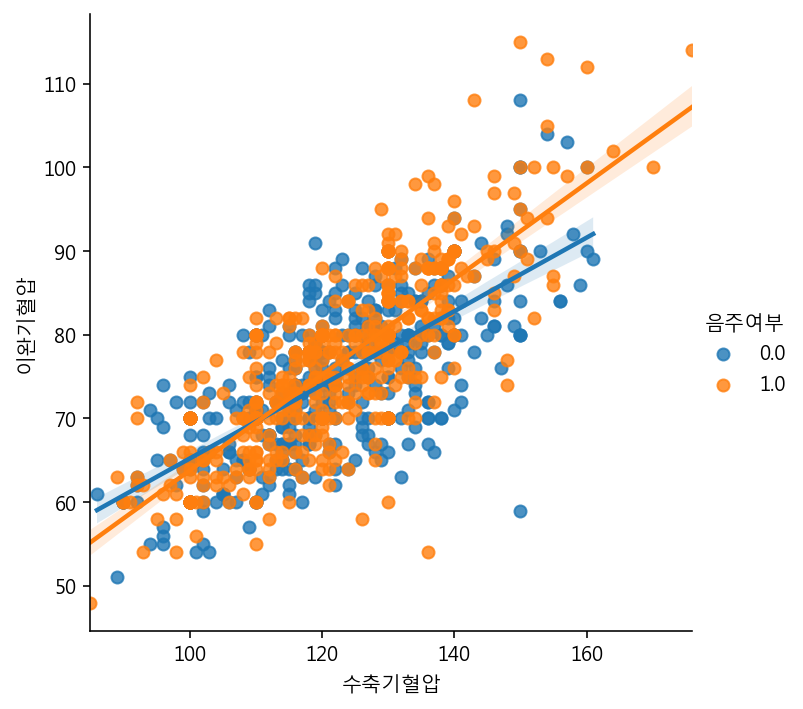

In [ ]:
# lmplot 으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현 가능

plt.figure(figsize=(8, 7))
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="음주여부")

# 음주여부는 수축기혈압과 이완기혈압에 강한 양의 상관관계가 있다.

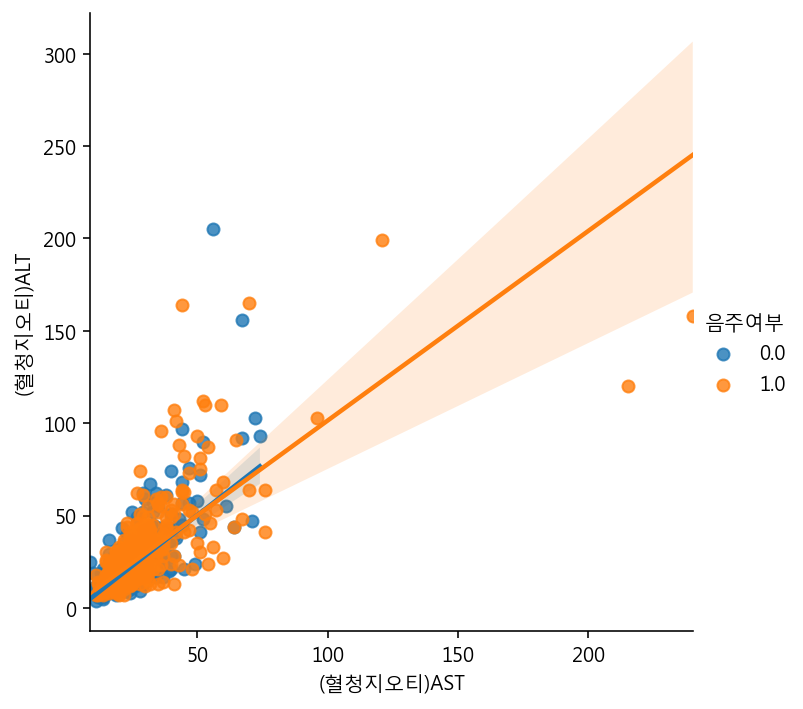

In [ ]:
# lmplot으로 "(혈청지오티)AST", "(혈청지오티)ALT"을 그리고 음주여부에 따라 다른 색상으로 표현
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True)

## 15.3 이상치 다루기
- 이상치가 있으면 데이터가 자세히 보이지 않거나 이상치로 인하여 회귀선이 달라짐
- 시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아 보기로 함

In [ ]:
# "(혈청지오티)AST"와 "(혈청지오티)ALT"가 400 이하인 값만 데이터프레임 형태로 추출해서
# df_ASLT 라는 변수에 담음
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"]<400) & (df_sample["(혈청지오티)ALT"]<400)]

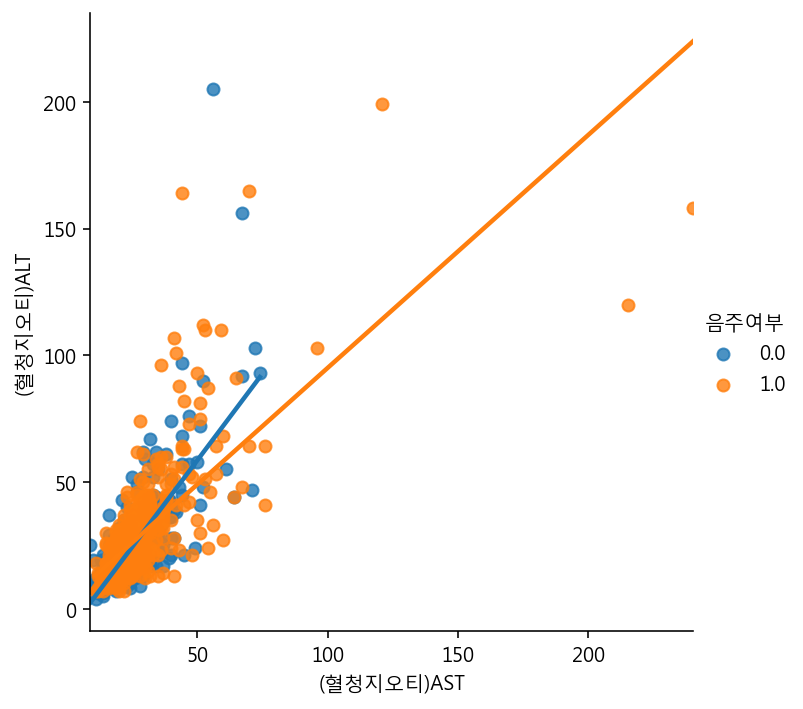

In [ ]:
# 이상치를 제거한 (혈청지오티)AST와 (혈청지오티)ALT를 lmplot으로 그리며
# 음주여부에 따라 다른 색으로 표현

sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [ ]:
# "(혈청지오티)AST"와 "(혈청지오티)ALT"가 400 이상인 값만 데이터프레임 형태로 추출해서
# df_ASLT_high 라는 변수에 담음

df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) & (df["(혈청지오티)ALT"] > 400)]

In [ ]:
# 위에서 구한 df_ASLT_high 데이터 프레임에 담겨진 혈청지오티가 높은 데이터만 확인

df_ASLT_high

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
4754    2017     4755     1            9    41        170         55   74.0   
26464   2017    26465     1            7    41        175         70   82.0   
38794   2017    38795     1           16    26        160         55   85.0   
40825   2017    40826     1            7    41        175         85   95.0   
48706   2017    48707     2           15    46        140         50   89.0   
...      ...      ...   ...          ...   ...        ...        ...    ...   
963939  2017   963940     1           10    41        175         70   76.5   
969350  2017   969351     2            9    28        160         55   81.0   
982305  2017   982306     2           16    28        155         50   79.3   
990867  2017   990868     2           11    41        145         45   75.0   
995323  2017   995324     1            7    11        185        105  101.4   

        시력(좌)  시력(우)  ...   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  \
4754      1.0    0.7  ...  14.6  1.0      0.9       911.0       430.0  125.0   
26464     1.2    1.2  ...  12.7  1.0      1.7       924.0      2309.0  169.0   
38794     0.3    0.5  ...  15.9  1.0      1.5       836.0      1159.0  334.0   
40825     1.5    1.2  ...  17.2  1.0      1.0       712.0      1330.0  116.0   
48706     1.0    1.2  ...  12.1  3.0      0.8      1870.0      2080.0  889.0   
...       ...    ...  ...   ...  ...      ...         ...         ...    ...   
963939    1.5    0.9  ...  12.5  1.0      1.0       483.0       457.0  567.0   
969350    1.2    1.0  ...  14.9  2.0      0.5       820.0       739.0  192.0   
982305    0.4    0.7  ...  10.3  2.0      1.1       665.0       443.0   71.0   
990867    0.9    1.2  ...  15.0  2.0      0.8       988.0      1198.0  279.0   
995323    0.7    0.7  ...  15.8  1.0      1.0       753.0      2059.0  174.0   

        흡연상태  음주여부  구강검진수검여부   데이터공개일자  
4754     3.0   1.0         0  20181126  
26464    1.0   0.0         1  20181126  
38794    2.0   1.0         0  20181126  
40825    2.0   1.0         0  20181126  
48706    1.0   0.0         1  20181126  
...      ...   ...       ...       ...  
963939   2.0   1.0         0  20181126  
969350   1.0   0.0         0  20181126  
982305   1.0   0.0         0  20181126  
990867   1.0   0.0         0  20181126  
995323   3.0   1.0         0  20181126  

[109 rows x 29 columns]

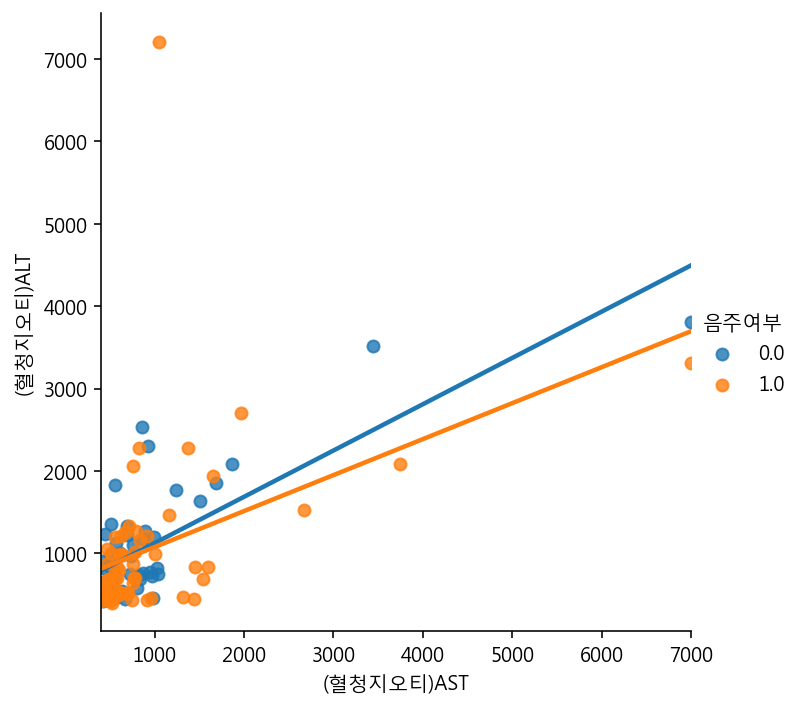

In [ ]:
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

## 15.4 distplot

In [ ]:
# 수치형 데이터로 된 columns을 찾기 위해 컬럼명만 따로 출력
# columns이 수치형으로 되어 있는 이유는 메모리를 줄이기 위함

df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '데이터공개일자'],
      dtype='object')

In [ ]:
# df_chol을 시리즈의 형태로 가져옴

df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]

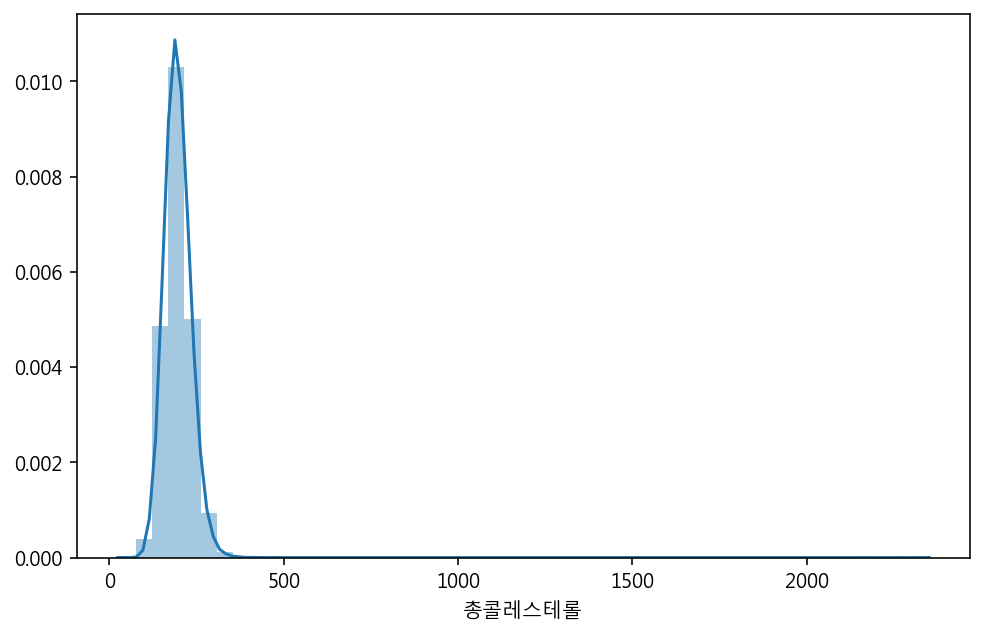

In [ ]:
# "총 콜레스테롤" 에 따른 distplot을 그림
# distplot 은 시리즈 형태의 데이터만을 가지고 올 수 있다,

plt.figure(figsize=(8,5))
sns.distplot(df_chol)

# 히스토그램과 확률 밀도함수와 같이 그려줌
# 값이 얼마나 치우쳐져 있는지, 얼마나 뾰족한지를 알수 있음(외도와 첨도)
# 이 그래프에서 초반에 값이 치우쳐 있는 이유는 500 이상의 이상치가 있기 떄문

In [ ]:
df_chol.describe()

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

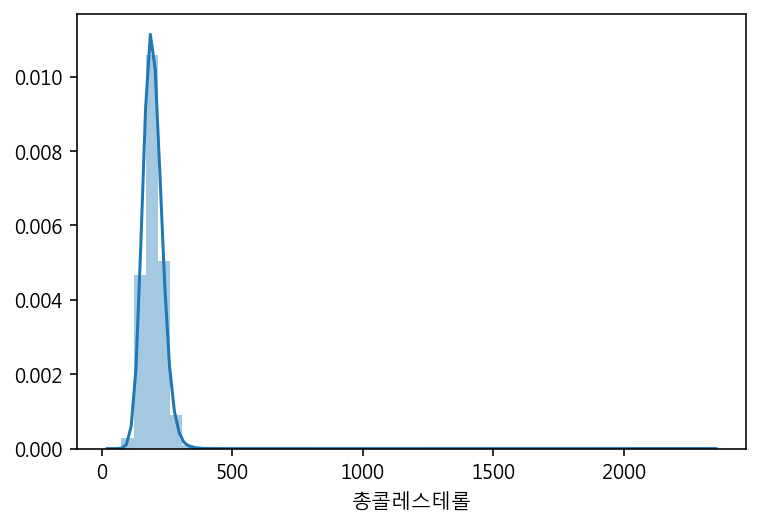

In [ ]:
# 음주여부가 1인 값에 대한 "총 콜레스테롤"을 distplot으로 출력
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), #행
    "총콜레스테롤"],) # 열

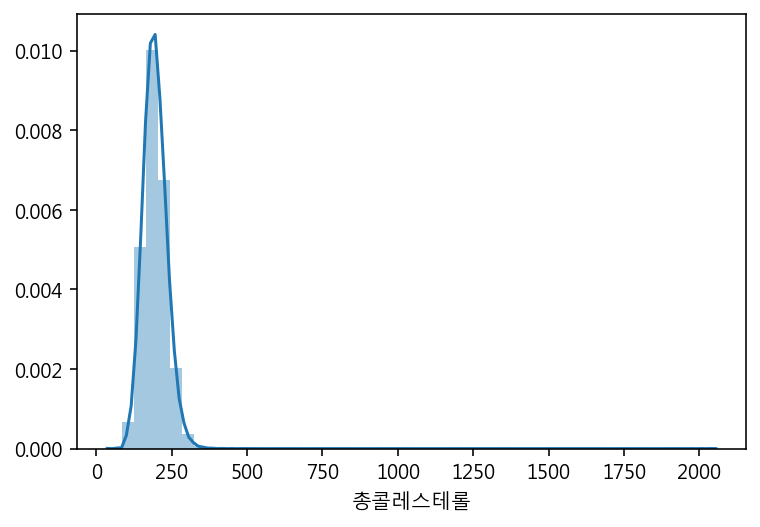

In [ ]:
# 음주여부가 0인 값에 대한 "총 콜레스테롤"을 distplot으로 출력
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), #행
    "총콜레스테롤"],) # 열

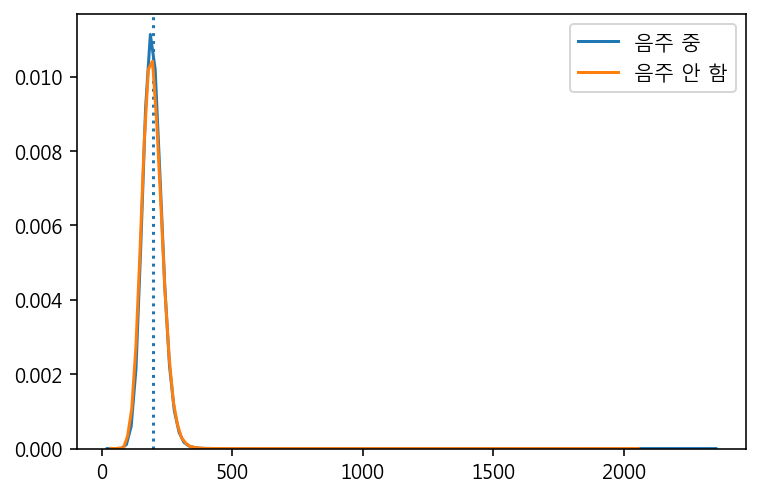

In [ ]:
# 음주여부 값에 대한 " 총 콜레스테롤"을 distplot 으로 그리며, 하나의 그래프로 표시되도록 함

plt.axvline(df["총콜레스테롤"].mean(), linestyle=":")
sns.kdeplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), #행
    "총콜레스테롤"], label="음주 중") # 열
sns.kdeplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), #행
    "총콜레스테롤"],label="음주 안 함") # 열

# 음주하는 사람들이 콜레스테롤 수치가 높은 것을 확인할 수 있음

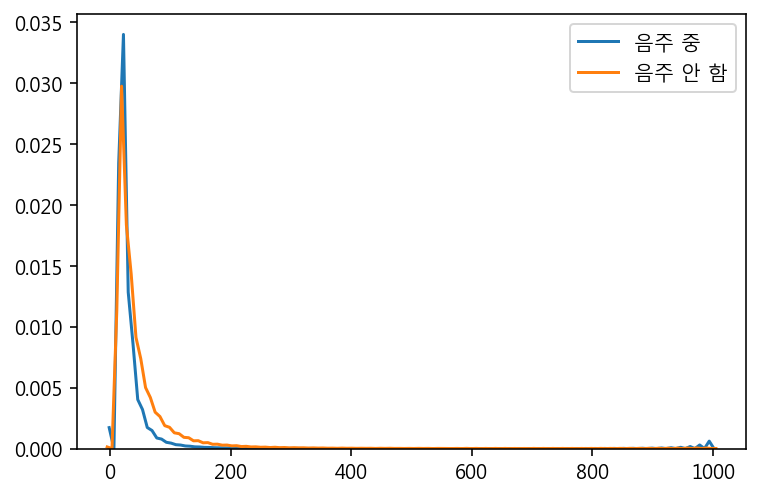

In [ ]:
# 감마지티피 값에 따라 음주여부를 시각화 함

s_1 =df.loc[df["음주여부"]==1,"감마지티피"]
s_0 =df.loc[df["음주여부"]==0,"감마지티피"]

sns.kdeplot(s_0, label="음주 중")
sns.kdeplot(s_1, label="음주 안 함")

# 음주하는 사람들이 감마지티피가 더 높은 것을 알 수 있음

# 16 상관분석

- r이 - 1.0과 - 0.7 사이면, 강한 음적 선형관계
- r이 - 0.7과 - 0.3 사이면, 뚜렷한 음적 선형관계
- r이 - 0.3과 - 0.1 사이면, 약한 음적 선형관계
- r이 - 0.1과 + 0.1 사이면, 거의 무시될 수 있는 선형관계
- r이 + 0.1과 + 0.3 사이면, 약한 양적 선형관계
- r이 + 0.3과 + 0.7 사이면, 뚜렷한 양적 선형관계
- r이 + 0.7과 + 1.0 사이면, 강한 양적 선형관계

In [ ]:
# 상관계수에 사용할 columns을 변수에 담음
columns = ["연령대코드(5세단위)", "체중(5Kg단위)", "신장(5Cm단위)", "허리둘레",
          "시력(좌)", "시력(우)", "청력(좌)", "청력(우)", 
          "수축기혈압", "이완기혈압", "식전혈당(공복혈당)",
          "총콜레스테롤", "트리글리세라이드", "HDL콜레스테롤", "LDL콜레스테롤", "혈색소", "요단백",
          "혈청크레아티닌", "(혈청지오티)AST", "(혈청지오티)ALT", "감마지티피", "흡연상태","음주여부"]
columns

['연령대코드(5세단위)',
 '체중(5Kg단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

## 16.1 상관계수 구하기

In [ ]:
# sample columns만 가져와 df_small이라는 데이터프레임에 담은 뒤 상관계수 계산

df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

연령대코드(5세단위)  체중(5Kg단위)  신장(5Cm단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.200336  -0.380239  0.159797 -0.217613 -0.308829   
체중(5Kg단위)      -0.200336   1.000000   0.665067  0.785950  0.122194  0.168929   
신장(5Cm단위)      -0.380239   0.665067   1.000000  0.312230  0.202426  0.236260   
허리둘레            0.159797   0.785950   0.312230  1.000000  0.017355  0.030809   
시력(좌)          -0.217613   0.122194   0.202426  0.017355  1.000000  0.346265   
시력(우)          -0.308829   0.168929   0.236260  0.030809  0.346265  1.000000   
청력(좌)           0.233960  -0.043727  -0.064044  0.050644 -0.039499 -0.072118   
청력(우)           0.264549  -0.047717  -0.074738  0.073086 -0.081000 -0.102880   
수축기혈압           0.222408   0.288983   0.063929  0.349219 -0.012888 -0.036395   
이완기혈압           0.091006   0.324783   0.157810  0.329256  0.027854  0.001282   
식전혈당(공복혈당)      0.215097   0.164926   0.005997  0.235417 -0.041152 -0.043653   
총콜레스테롤         -0.008847   0.050713  -0.004133  0.036389 -0.052320  0.016831   
트리글리세라이드        0.037474   0.260689   0.135087  0.267643  0.032493  0.070753   
HDL콜레스테롤       -0.095972  -0.330577  -0.207537 -0.311478 -0.045579 -0.068572   
LDL콜레스테롤        0.008560   0.043839   0.008146  0.017287 -0.052768  0.003336   
혈색소            -0.178977   0.540191   0.541155  0.377673  0.142582  0.190303   
요단백             0.058702   0.012154  -0.007699  0.045948 -0.024741 -0.024977   
혈청크레아티닌         0.044958   0.170468   0.212811  0.131421  0.022175  0.080797   
(혈청지오티)AST      0.129357   0.193976   0.055783  0.253549  0.011212  0.003236   
(혈청지오티)ALT     -0.009871   0.401756   0.159199  0.407063  0.080793  0.123455   
감마지티피          -0.015357   0.246924   0.185091  0.234831  0.111903  0.035304   
흡연상태           -0.121132   0.392874   0.512294  0.246296  0.141441  0.089486   
음주여부           -0.275285   0.290207   0.410946  0.134891  0.081130  0.158678   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.233960  0.264549  0.222408  0.091006  ... -0.095972  0.008560   
체중(5Kg단위)   -0.043727 -0.047717  0.288983  0.324783  ... -0.330577  0.043839   
신장(5Cm단위)   -0.064044 -0.074738  0.063929  0.157810  ... -0.207537  0.008146   
허리둘레         0.050644  0.073086  0.349219  0.329256  ... -0.311478  0.017287   
시력(좌)       -0.039499 -0.081000 -0.012888  0.027854  ... -0.045579 -0.052768   
시력(우)       -0.072118 -0.102880 -0.036395  0.001282  ... -0.068572  0.003336   
청력(좌)        1.000000  0.565295  0.039115 -0.015526  ... -0.047898  0.006018   
청력(우)        0.565295  1.000000  0.056661 -0.005658  ... -0.069527 -0.032362   
수축기혈압        0.039115  0.056661  1.000000  0.751731  ... -0.093036 -0.007070   
이완기혈압       -0.015526 -0.005658  0.751731  1.000000  ... -0.091701  0.038887   
식전혈당(공복혈당)   0.012104  0.069277  0.218697  0.160601  ... -0.132477  0.043905   
총콜레스테롤       0.008247 -0.047907  0.039290  0.084102  ...  0.025190  0.861641   
트리글리세라이드     0.018695  0.034650  0.233447  0.225436  ... -0.312560  0.064503   
HDL콜레스테롤    -0.047898 -0.069527 -0.093036 -0.091701  ...  1.000000 -0.162307   
LDL콜레스테롤     0.006018 -0.032362 -0.007070  0.038887  ... -0.162307  1.000000   
혈색소         -0.000433 -0.050208  0.169241  0.255690  ... -0.252492  0.068631   
요단백          0.041231  0.081749  0.043110  0.035826  ... -0.058606  0.092367   
혈청크레아티닌      0.016792  0.017758  0.034018  0.081965  ... -0.141626 -0.013668   
(혈청지오티)AST   0.020671 -0.004681  0.133472  0.131482  ... -0.060252 -0.011918   
(혈청지오티)ALT   0.044048 -0.019893  0.163762  0.191155  ... -0.169802  0.022981   
감마지티피       -0.025004 -0.024936  0.191333  0.200150  ... -0.067822  0.007599   
흡연상태         0.007413 -0.042159  0.094145  0.144974  ... -0.213555  0.025842   
음주여부        -0.053293 -0.072404  0.042372  0.108679  ... -0.016938 -0.023031   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
연령대코드(5세단위) -0.178977  0.058702  0.044958    0.129357   -0.009871 -0.015357   
체중(5Kg단위)    

In [ ]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터를 조사

df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]

체중(5Kg단위)    0.665067
신장(5Cm단위)    1.000000
허리둘레         0.312230
혈색소          0.541155
흡연상태         0.512294
음주여부         0.410946
Name: 신장(5Cm단위), dtype: float64

In [ ]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터를 조사

df_corr.loc[df_corr["음주여부"] > 0.25, "음주여부"]

체중(5Kg단위)    0.290207
신장(5Cm단위)    0.410946
혈색소          0.312005
흡연상태         0.344286
음주여부         1.000000
Name: 음주여부, dtype: float64

In [ ]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이트를 조사
df_corr["혈색소"].sort_values(ascending=False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.541155
체중(5Kg단위)     0.540191
흡연상태          0.434467
허리둘레          0.377673
(혈청지오티)ALT    0.331891
음주여부          0.312005
Name: 혈색소, dtype: float64

In [ ]:
# 감마지티피에 대한 상관계수가 특정 수치 이상인 데이터를 조사
df_corr["감마지티피"].sort_values(ascending=False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.531529
(혈청지오티)ALT    0.424481
트리글리세라이드      0.271554
체중(5Kg단위)     0.246924
혈색소           0.245109
허리둘레          0.234831
Name: 감마지티피, dtype: float64

## 16.2 heatmap

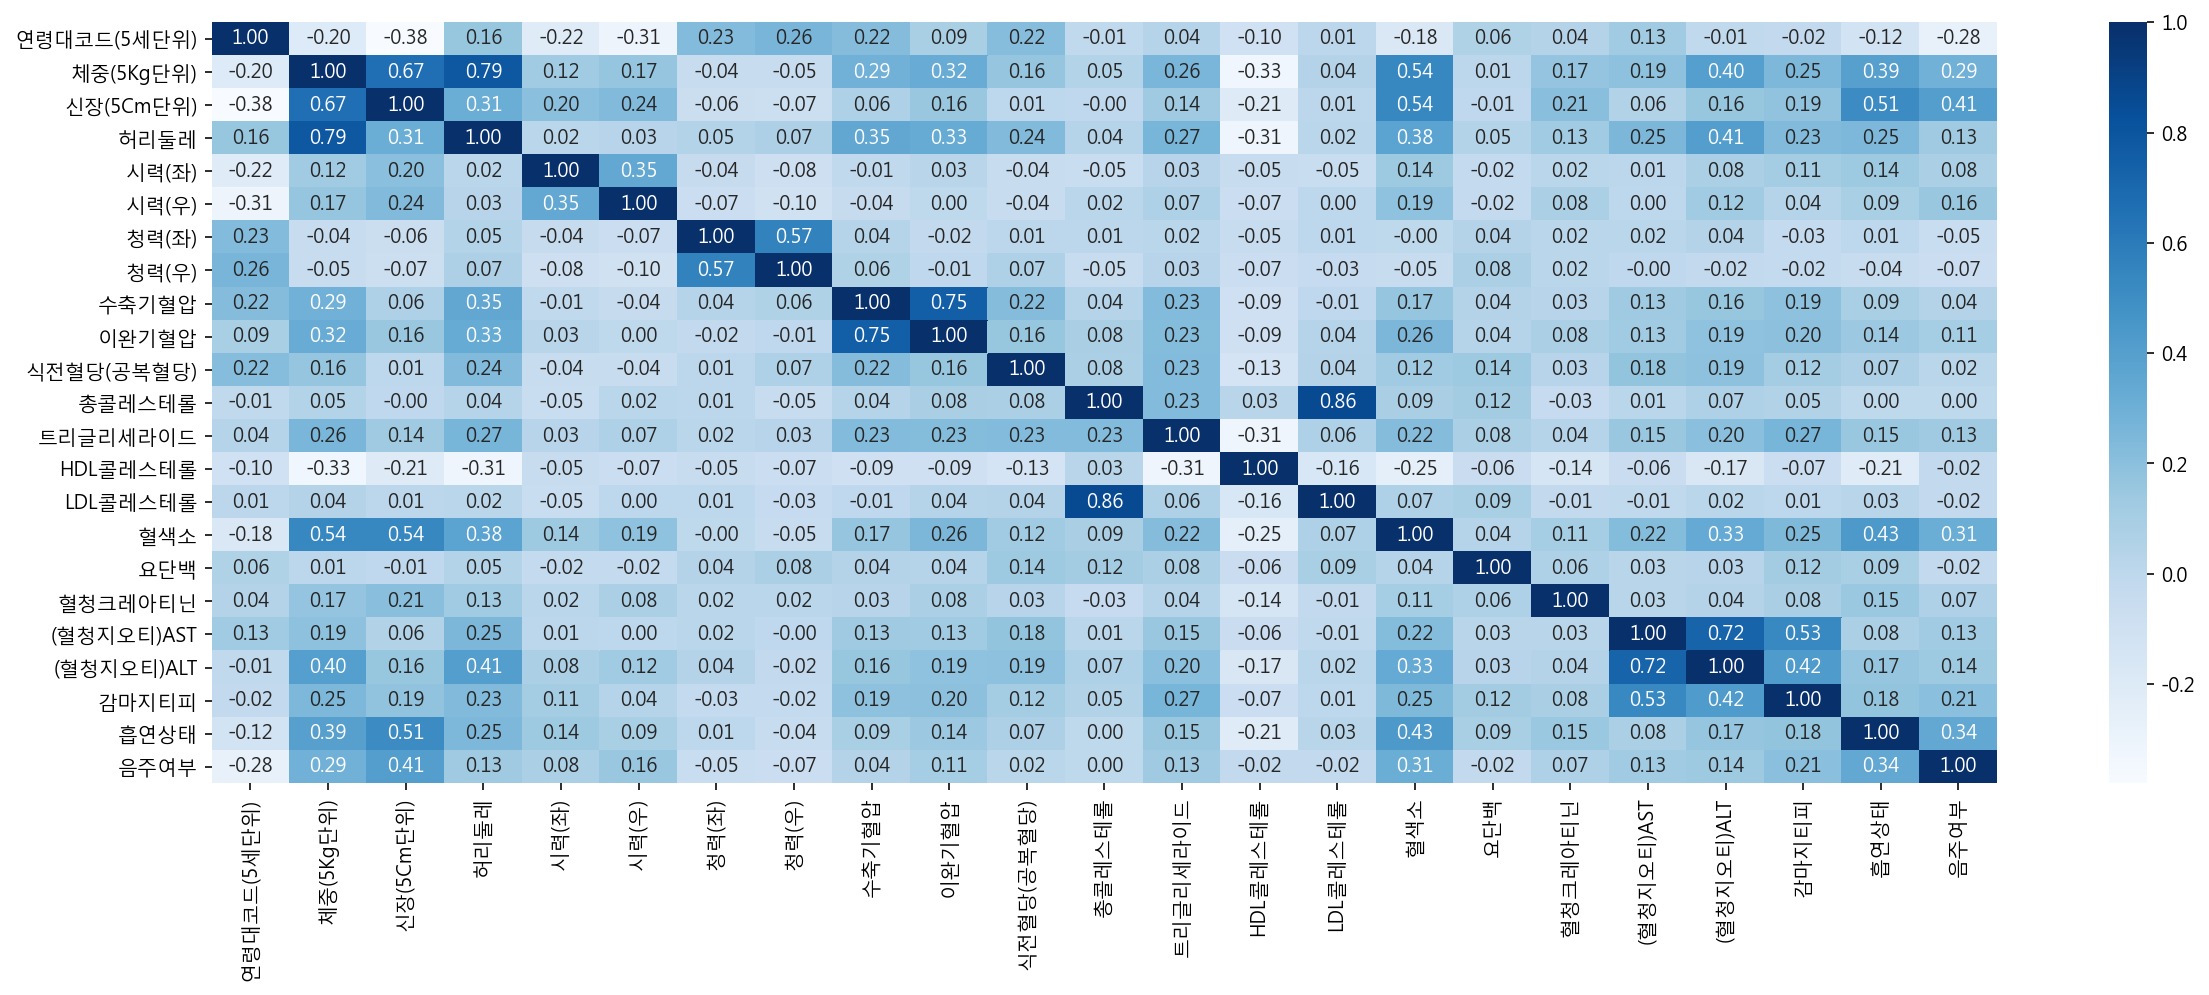

In [ ]:
plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

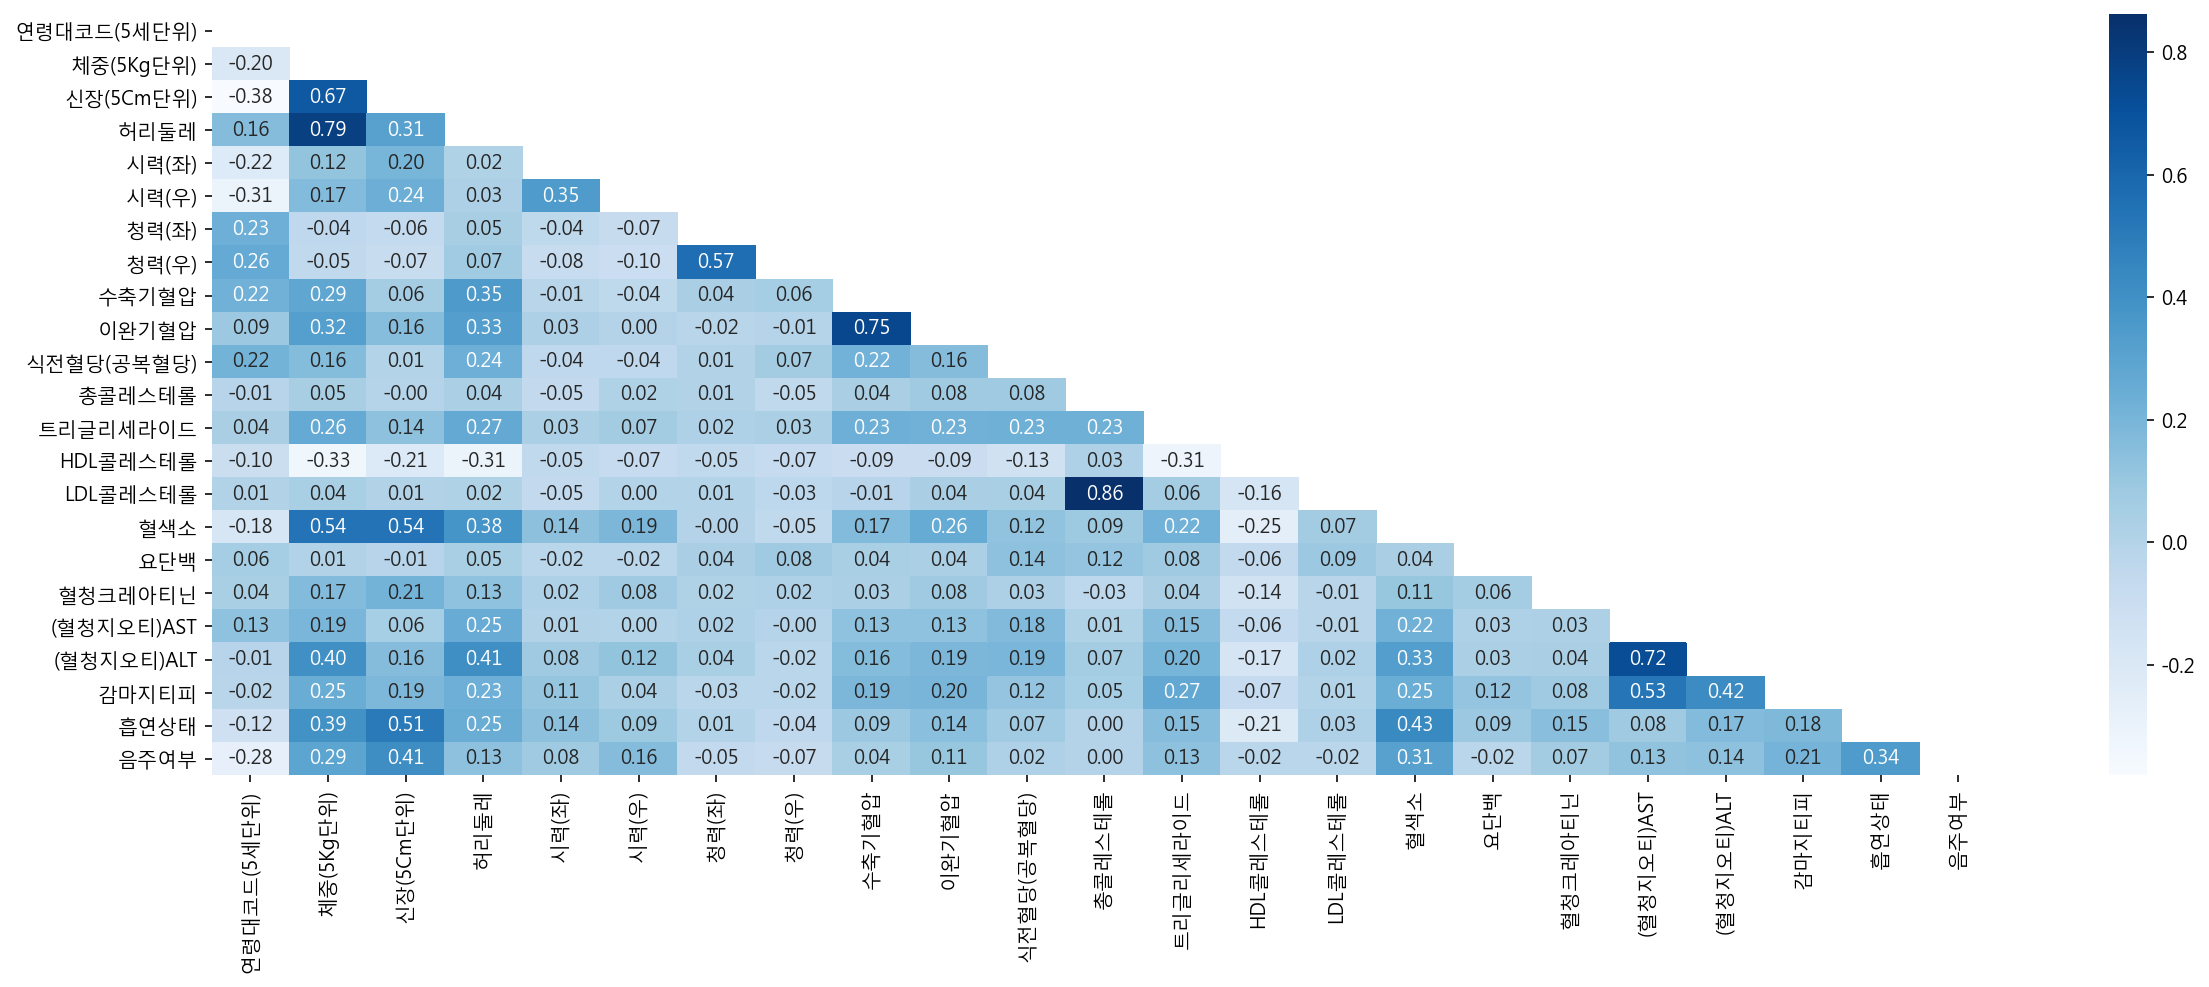

In [ ]:
mask=np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

# 신장은 허리둘레와 체중에 상관관계가 있으며
# 음주여부에 따라 건강검진 수치 또한 상관관계가 있다